In [0]:
# pandas and numpy for data manipulation
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
import scipy
from scipy import stats
import numpy as np # linear algebra
import datetime
import statsmodels.formula.api as smf
from tqdm import tqdm_notebook as tqdm
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.decomposition import PCA  
from sklearn.mixture import GaussianMixture
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


In [0]:
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline
!pip install ipywidgets
!pip install xgboost

# Importando os DATASETS

In [0]:
#read the data in  
#BASE_ATRASOS_TESTE = pd.read_csv('C:/Users/ltakahashi/OneDrive/DigitalHouse/HACKAPAN/ATRASO_TESTE.TXT', delimiter=';', encoding='latin1', engine='c', low_memory=True)
#BASE_ATRASOS_DEV = pd.read_csv('C:/Users/ltakahashi/OneDrive/DigitalHouse/HACKAPAN/ATRASO_DEV.TXT', delimiter=';', encoding='latin1', engine='c', low_memory=True)
#BASE_CARTOES_TESTE = pd.read_csv('C:/Users/ltakahashi/OneDrive/DigitalHouse/HACKAPAN/CARTOES_TESTE.TXT', delimiter=';', parse_dates=["DT_CONTRATACAO", "DATA_ATIVACAO", "DATA_NASCIMENTO_CLIENTE"], encoding='latin1', engine='c', low_memory=True)
#BASE_CARTOES_DEV = pd.read_csv('C:/Users/ltakahashi/OneDrive/DigitalHouse/HACKAPAN/CARTOES_DEV_v4.TXT', delimiter=';', parse_dates=["DT_CONTRATACAO", "DATA_ATIVACAO", "DATA_NASCIMENTO_CLIENTE"], encoding='latin1', engine='c', low_memory=True)
#BASE_TRANSACOES = pd.read_csv('C:/Users/ltakahashi/OneDrive/DigitalHouse/HACKAPAN/BASE_TRANSACOES_HACKAPAN.TXT', delimiter=';', parse_dates=["DATA_HORA"], encoding='latin1', engine='c', low_memory=True)
BASE_CARTOES_DEV = pd.read_csv('C:/Users/ltakahashi/OneDrive/DigitalHouse/HACKAPAN/CARTOES_ATRASO_DEV_V2.TXT', delimiter=';', encoding='latin1', engine='c', low_memory=True)
BASE_CARTOES_TESTE = pd.read_csv('C:/Users/ltakahashi/OneDrive/DigitalHouse/HACKAPAN/CARTOES_ATRASO_TS_V2.TXT', delimiter=';', encoding='latin1', engine='c', low_memory=True)


In [0]:
BASE_CARTOES_TESTE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25967 entries, 0 to 25966
Columns: 159 entries, ID to DESV_N_COMERCIAL_SUM_VL_TRANSACAO
dtypes: float64(61), int64(12), object(86)
memory usage: 31.5+ MB


In [0]:
def set_numeric(df):    
  x_columns = [    
      'LIMITE_CREDITO_CARTAO',
      'RENDA_INFORMADA',
      'RENDA_BUREAU1',
      'RENDA_BUREAU2',
      'SCORE_CREDITO_BUREAU1',
      'SCORE_CREDITO_BUREAU2',
      'SCORE_FRAUDE',
      'PERCT_ACERTO_RENDA_BUREAU',
      'PERC_PAGTO'
  ]
  
  for c in x_columns:
    df[c] = df[c].apply(lambda x: float(str(x).replace(',','.')))
  
  return df
BASE_CARTOES_TESTE = set_numeric(BASE_CARTOES_TESTE)
BASE_CARTOES_DEV = set_numeric(BASE_CARTOES_DEV)

In [0]:
df_ESTADO_CIVIL_DEV_nan                   = BASE_CARTOES_DEV[BASE_CARTOES_DEV['ESTADO_CIVIL'].isna()]
df_ESTADO_CIVIL_TESTE_nan                 = BASE_CARTOES_TESTE[BASE_CARTOES_TESTE['ESTADO_CIVIL'].isna()]
df_NATURALIDADE_DEV_nan                   = BASE_CARTOES_DEV[BASE_CARTOES_DEV['NATURALIDADE'].isna()]
df_NATURALIDADE_TESTE_nan                 = BASE_CARTOES_TESTE[BASE_CARTOES_TESTE['NATURALIDADE'].isna()]
df_DOMINIO_EMAIL_DEV_nan                  = BASE_CARTOES_DEV[BASE_CARTOES_DEV['DOMINIO_EMAIL'].isna()]
df_DOMINIO_EMAIL_TESTE_nan                = BASE_CARTOES_TESTE[BASE_CARTOES_TESTE['DOMINIO_EMAIL'].isna()]
df_ESCOLARIDADE_DEV_nan                   = BASE_CARTOES_DEV[BASE_CARTOES_DEV['ESCOLARIDADE'].isna()]
df_ESCOLARIDADE_TESTE_nan                 = BASE_CARTOES_TESTE[BASE_CARTOES_TESTE['ESCOLARIDADE'].isna()]
df_CEP_COMERCIAL_INFORMADO_DEV_nan        = BASE_CARTOES_DEV[BASE_CARTOES_DEV['CEP_COMERCIAL_INFORMADO'].isna()]
df_CEP_COMERCIAL_INFORMADO_TESTE_nan      = BASE_CARTOES_TESTE[BASE_CARTOES_TESTE['CEP_COMERCIAL_INFORMADO'].isna()]
df_DDD_CELULAR_DEV_nan                    = BASE_CARTOES_DEV[BASE_CARTOES_DEV['DDD_CELULAR'].isna()]
df_DDD_CELULAR_TESTE_nan                  = BASE_CARTOES_TESTE[BASE_CARTOES_TESTE['DDD_CELULAR'].isna()]
df_DDD_RESIDENCIAL_INFORMADO_DEV_nan      = BASE_CARTOES_DEV[BASE_CARTOES_DEV['DDD_RESIDENCIAL_INFORMADO'].isna()]
df_DDD_RESIDENCIAL_INFORMADO_TESTE_nan    = BASE_CARTOES_TESTE[BASE_CARTOES_TESTE['DDD_RESIDENCIAL_INFORMADO'].isna()]
df_DDD_COMERCIAL_INFORMADO_DEV_nan        = BASE_CARTOES_DEV[BASE_CARTOES_DEV['DDD_COMERCIAL_INFORMADO'].isna()]
df_DDD_COMERCIAL_INFORMADO_TESTE_nan      = BASE_CARTOES_TESTE[BASE_CARTOES_TESTE['DDD_COMERCIAL_INFORMADO'].isna()]
df_UF_EMISSAO_RG_DEV_nan                  = BASE_CARTOES_DEV[BASE_CARTOES_DEV['UF_EMISSAO_RG'].isna()]
df_UF_EMISSAO_RG_TESTE_nan                = BASE_CARTOES_TESTE[BASE_CARTOES_TESTE['UF_EMISSAO_RG'].isna()]
df_UF_COMERCIAL_INFORMADO_DEV_nan         = BASE_CARTOES_DEV[BASE_CARTOES_DEV['UF_COMERCIAL_INFORMADO'].isna()]
df_UF_COMERCIAL_INFORMADO_TESTE_nan       = BASE_CARTOES_TESTE[BASE_CARTOES_TESTE['UF_COMERCIAL_INFORMADO'].isna()]
df_CIDADE_RESIDENCIAL_INFORMADO_DEV_nan   = BASE_CARTOES_DEV[BASE_CARTOES_DEV['CIDADE_RESIDENCIAL_INFORMADO'].isna()]
df_CIDADE_RESIDENCIAL_INFORMADO_TESTE_nan = BASE_CARTOES_TESTE[BASE_CARTOES_TESTE['CIDADE_RESIDENCIAL_INFORMADO'].isna()]



df_ESCOLARIDADE_BUREAU1_DEV_nan        = BASE_CARTOES_DEV[BASE_CARTOES_DEV['ESCOLARIDADE_BUREAU1'].isna()]
df_ESCOLARIDADE_BUREAU1_TESTE_nan      = BASE_CARTOES_TESTE[BASE_CARTOES_TESTE['ESCOLARIDADE_BUREAU1'].isna()]
df_COD_PROFISSAO_BUREAU1_DEV_nan       = BASE_CARTOES_DEV[BASE_CARTOES_DEV['COD_PROFISSAO_BUREAU1'].isna()]
df_COD_PROFISSAO_BUREAU1_TESTE_nan     = BASE_CARTOES_TESTE[BASE_CARTOES_TESTE['COD_PROFISSAO_BUREAU1'].isna()]
df_CEP1_BUREAU1_DEV_nan                = BASE_CARTOES_DEV[BASE_CARTOES_DEV['CEP1_BUREAU1'].isna()]
df_CEP1_BUREAU1_TESTE_nan              = BASE_CARTOES_TESTE[BASE_CARTOES_TESTE['CEP1_BUREAU1'].isna()]
df_CEP2_BUREAU1_DEV_nan                = BASE_CARTOES_DEV[BASE_CARTOES_DEV['CEP2_BUREAU1'].isna()]
df_CEP2_BUREAU1_TESTE_nan              = BASE_CARTOES_TESTE[BASE_CARTOES_TESTE['CEP2_BUREAU1'].isna()]
df_CEP3_BUREAU1_DEV_nan                = BASE_CARTOES_DEV[BASE_CARTOES_DEV['CEP3_BUREAU1'].isna()]
df_CEP3_BUREAU1_TESTE_nan              = BASE_CARTOES_TESTE[BASE_CARTOES_TESTE['CEP3_BUREAU1'].isna()]
df_CEP1_BUREAU2_DEV_nan                = BASE_CARTOES_DEV[BASE_CARTOES_DEV['CEP1_BUREAU2'].isna()]
df_CEP1_BUREAU2_TESTE_nan              = BASE_CARTOES_TESTE[BASE_CARTOES_TESTE['CEP1_BUREAU2'].isna()]
df_CEP2_BUREAU2_DEV_nan                = BASE_CARTOES_DEV[BASE_CARTOES_DEV['CEP2_BUREAU2'].isna()]
df_CEP2_BUREAU2_TESTE_nan              = BASE_CARTOES_TESTE[BASE_CARTOES_TESTE['CEP2_BUREAU2'].isna()]
df_CEP3_BUREAU2_DEV_nan                = BASE_CARTOES_DEV[BASE_CARTOES_DEV['CEP3_BUREAU2'].isna()]
df_CEP3_BUREAU2_TESTE_nan              = BASE_CARTOES_TESTE[BASE_CARTOES_TESTE['CEP3_BUREAU2'].isna()]
df_CEP4_BUREAU2_DEV_nan                = BASE_CARTOES_DEV[BASE_CARTOES_DEV['CEP4_BUREAU2'].isna()]
df_CEP4_BUREAU2_TESTE_nan              = BASE_CARTOES_TESTE[BASE_CARTOES_TESTE['CEP4_BUREAU2'].isna()]
df_DDD1_BUREAU1_DEV_nan                = BASE_CARTOES_DEV[BASE_CARTOES_DEV['DDD1_BUREAU1'].isna()]
df_DDD1_BUREAU1_TESTE_nan              = BASE_CARTOES_TESTE[BASE_CARTOES_TESTE['DDD1_BUREAU1'].isna()]
df_DDD2_BUREAU1_DEV_nan                = BASE_CARTOES_DEV[BASE_CARTOES_DEV['DDD2_BUREAU1'].isna()]
df_DDD2_BUREAU1_TESTE_nan              = BASE_CARTOES_TESTE[BASE_CARTOES_TESTE['DDD2_BUREAU1'].isna()]
df_DDD3_BUREAU1_DEV_nan                = BASE_CARTOES_DEV[BASE_CARTOES_DEV['DDD3_BUREAU1'].isna()]
df_DDD3_BUREAU1_TESTE_nan              = BASE_CARTOES_TESTE[BASE_CARTOES_TESTE['DDD3_BUREAU1'].isna()]
df_DDD4_BUREAU1_DEV_nan                = BASE_CARTOES_DEV[BASE_CARTOES_DEV['DDD4_BUREAU1'].isna()]
df_DDD4_BUREAU1_TESTE_nan              = BASE_CARTOES_TESTE[BASE_CARTOES_TESTE['DDD4_BUREAU1'].isna()]
df_DDD5_BUREAU1_DEV_nan                = BASE_CARTOES_DEV[BASE_CARTOES_DEV['DDD5_BUREAU1'].isna()]
df_DDD5_BUREAU1_TESTE_nan              = BASE_CARTOES_TESTE[BASE_CARTOES_TESTE['DDD5_BUREAU1'].isna()]
df_UF1_BUREAU1_DEV_nan                 = BASE_CARTOES_DEV[BASE_CARTOES_DEV['UF1_BUREAU1'].isna()]
df_UF1_BUREAU1_TESTE_nan               = BASE_CARTOES_TESTE[BASE_CARTOES_TESTE['UF1_BUREAU1'].isna()]
df_UF2_BUREAU1_DEV_nan                 = BASE_CARTOES_DEV[BASE_CARTOES_DEV['UF2_BUREAU1'].isna()]
df_UF2_BUREAU1_TESTE_nan               = BASE_CARTOES_TESTE[BASE_CARTOES_TESTE['UF2_BUREAU1'].isna()]
df_UF3_BUREAU1_DEV_nan                 = BASE_CARTOES_DEV[BASE_CARTOES_DEV['UF3_BUREAU1'].isna()]
df_UF3_BUREAU1_TESTE_nan               = BASE_CARTOES_TESTE[BASE_CARTOES_TESTE['UF3_BUREAU1'].isna()]
df_UF4_BUREAU1_DEV_nan                 = BASE_CARTOES_DEV[BASE_CARTOES_DEV['UF4_BUREAU1'].isna()]
df_UF4_BUREAU1_TESTE_nan               = BASE_CARTOES_TESTE[BASE_CARTOES_TESTE['UF4_BUREAU1'].isna()]
df_UF5_BUREAU1_DEV_nan                 = BASE_CARTOES_DEV[BASE_CARTOES_DEV['UF5_BUREAU1'].isna()]
df_UF5_BUREAU1_TESTE_nan               = BASE_CARTOES_TESTE[BASE_CARTOES_TESTE['UF5_BUREAU1'].isna()]
df_CIDADE1_BUREAU1_DEV_nan             = BASE_CARTOES_DEV[BASE_CARTOES_DEV['CIDADE1_BUREAU1'].isna()]
df_CIDADE1_BUREAU1_TESTE_nan           = BASE_CARTOES_TESTE[BASE_CARTOES_TESTE['CIDADE1_BUREAU1'].isna()]
df_CIDADE1_BUREAU2_DEV_nan             = BASE_CARTOES_DEV[BASE_CARTOES_DEV['CIDADE2_BUREAU1'].isna()]
df_CIDADE1_BUREAU2_TESTE_nan           = BASE_CARTOES_TESTE[BASE_CARTOES_TESTE['CIDADE2_BUREAU1'].isna()]
df_CIDADE1_BUREAU3_DEV_nan             = BASE_CARTOES_DEV[BASE_CARTOES_DEV['CIDADE3_BUREAU1'].isna()]
df_CIDADE1_BUREAU3_TESTE_nan           = BASE_CARTOES_TESTE[BASE_CARTOES_TESTE['CIDADE3_BUREAU1'].isna()]
df_CIDADE1_BUREAU4_DEV_nan             = BASE_CARTOES_DEV[BASE_CARTOES_DEV['CIDADE4_BUREAU1'].isna()]
df_CIDADE1_BUREAU4_TESTE_nan           = BASE_CARTOES_TESTE[BASE_CARTOES_TESTE['CIDADE4_BUREAU1'].isna()]
df_CIDADE1_BUREAU5_DEV_nan             = BASE_CARTOES_DEV[BASE_CARTOES_DEV['CIDADE5_BUREAU1'].isna()]
df_CIDADE1_BUREAU5_TESTE_nan           = BASE_CARTOES_TESTE[BASE_CARTOES_TESTE['CIDADE5_BUREAU1'].isna()]
df_RENDA_BUREAU1_DEV_nan               = BASE_CARTOES_DEV[BASE_CARTOES_DEV['RENDA_BUREAU1'].isna()]
df_RENDA_BUREAU1_TESTE_nan             = BASE_CARTOES_TESTE[BASE_CARTOES_TESTE['RENDA_BUREAU1'].isna()]
df_RENDA_BUREAU2_DEV_nan               = BASE_CARTOES_DEV[BASE_CARTOES_DEV['RENDA_BUREAU2'].isna()]
df_RENDA_BUREAU2_TESTE_nan             = BASE_CARTOES_TESTE[BASE_CARTOES_TESTE['RENDA_BUREAU2'].isna()]
df_SCORE_CREDITO_BUREAU1_DEV_nan       = BASE_CARTOES_DEV[BASE_CARTOES_DEV['SCORE_CREDITO_BUREAU1'].isna()]
df_SCORE_CREDITO_BUREAU1_TESTE_nan     = BASE_CARTOES_TESTE[BASE_CARTOES_TESTE['SCORE_CREDITO_BUREAU1'].isna()]
df_SCORE_CREDITO_BUREAU2_DEV_nan       = BASE_CARTOES_DEV[BASE_CARTOES_DEV['SCORE_CREDITO_BUREAU2'].isna()]
df_SCORE_CREDITO_BUREAU2_TESTE_nan     = BASE_CARTOES_TESTE[BASE_CARTOES_TESTE['SCORE_CREDITO_BUREAU2'].isna()]
df_SCORE_FRAUDE_DEV_nan                = BASE_CARTOES_DEV[BASE_CARTOES_DEV['SCORE_FRAUDE'].isna()]
df_SCORE_FRAUDE_TESTE_nan              = BASE_CARTOES_TESTE[BASE_CARTOES_TESTE['SCORE_FRAUDE'].isna()]
df_PERCT_ACERTO_RENDA_BUREAU_DEV_nan   = BASE_CARTOES_DEV[BASE_CARTOES_DEV['PERCT_ACERTO_RENDA_BUREAU'].isna()]
df_PERCT_ACERTO_RENDA_BUREAU_TESTE_nan = BASE_CARTOES_TESTE[BASE_CARTOES_TESTE['PERCT_ACERTO_RENDA_BUREAU'].isna()]


df_MDA_DEV_nan    = BASE_CARTOES_DEV[BASE_CARTOES_DEV['MDA'].isna()]
df_MDA_TESTE_nan  = BASE_CARTOES_TESTE[BASE_CARTOES_TESTE['MDA'].isna()]

In [0]:
print("ESTADO_CIVIL_DEV:")
print(df_ESTADO_CIVIL_DEV_nan.FRAUDE.value_counts())
print("ESTADO_CIVIL_TESTE:")
print(df_ESTADO_CIVIL_TESTE_nan.FRAUDE.value_counts())
print("NATURALIDADE_DEV:")
print(df_NATURALIDADE_DEV_nan.FRAUDE.value_counts())
print("NATURALIDADE_TESTE:")
print(df_NATURALIDADE_TESTE_nan.FRAUDE.value_counts())
print("DOMINIO_EMAIL_DEV:")
print(df_DOMINIO_EMAIL_DEV_nan.FRAUDE.value_counts())
print("DOMINIO_EMAIL_TESTE:")
print(df_DOMINIO_EMAIL_TESTE_nan.FRAUDE.value_counts())
print("ESCOLARIDADE_DEV:")
print(df_ESCOLARIDADE_DEV_nan.FRAUDE.value_counts())
print("ESCOLARIDADE_TESTE:")
print(df_ESCOLARIDADE_TESTE_nan.FRAUDE.value_counts())
print("ESCOLARIDADE_DEV:")
print(df_ESCOLARIDADE_DEV_nan.FRAUDE.value_counts())
print("ESCOLARIDADE_TESTE:")
print(df_ESCOLARIDADE_TESTE_nan.FRAUDE.value_counts())
print("CEP_COMERCIAL_INFORMADO_DEV:")
print(df_CEP_COMERCIAL_INFORMADO_DEV_nan.FRAUDE.value_counts())
print("CEP_COMERCIAL_INFORMADO_TESTE:")
print(df_CEP_COMERCIAL_INFORMADO_TESTE_nan.FRAUDE.value_counts())
print("_DDD_CELULAR_DEV:")
print(df_DDD_CELULAR_DEV_nan.FRAUDE.value_counts())
print("DDD_CELULAR_TESTE:")
print(df_DDD_CELULAR_TESTE_nan.FRAUDE.value_counts())
print("DDD_RESIDENCIAL_INFORMADO_DEV:")
print(df_DDD_RESIDENCIAL_INFORMADO_DEV_nan.FRAUDE.value_counts())
print("DDD_RESIDENCIAL_INFORMADO_TESTE:")
print(df_DDD_RESIDENCIAL_INFORMADO_TESTE_nan.FRAUDE.value_counts())
print("DDD_COMERCIAL_INFORMADO_DEV:")
print(df_DDD_COMERCIAL_INFORMADO_DEV_nan.FRAUDE.value_counts())
print("DDD_COMERCIAL_INFORMADO_TESTE:")
print(df_DDD_COMERCIAL_INFORMADO_TESTE_nan.FRAUDE.value_counts())
print("UF_EMISSAO_RG_DEV:")
print(df_UF_EMISSAO_RG_DEV_nan.FRAUDE.value_counts())
print("UF_EMISSAO_RG_TESTE:")
print(df_UF_EMISSAO_RG_TESTE_nan.FRAUDE.value_counts())
print("UF_COMERCIAL_INFORMADO_DEV:")
print(df_UF_COMERCIAL_INFORMADO_DEV_nan.FRAUDE.value_counts())
print("UF_COMERCIAL_INFORMADO_TESTE:")
print(df_UF_COMERCIAL_INFORMADO_TESTE_nan.FRAUDE.value_counts())
print("CIDADE_RESIDENCIAL_INFORMADO_DEV:")
print(df_CIDADE_RESIDENCIAL_INFORMADO_DEV_nan.FRAUDE.value_counts())
print("CIDADE_RESIDENCIAL_INFORMADO_TESTE:")
print(df_CIDADE_RESIDENCIAL_INFORMADO_TESTE_nan.FRAUDE.value_counts())

ESTADO_CIVIL_DEV:
0    42955
1      349
Name: FRAUDE, dtype: int64
ESTADO_CIVIL_TESTE:
0    18406
1      165
Name: FRAUDE, dtype: int64
NATURALIDADE_DEV:
0    44002
1      352
Name: FRAUDE, dtype: int64
NATURALIDADE_TESTE:
0    18834
1      166
Name: FRAUDE, dtype: int64
DOMINIO_EMAIL_DEV:
0    13669
1       23
Name: FRAUDE, dtype: int64
DOMINIO_EMAIL_TESTE:
0    5857
1       6
Name: FRAUDE, dtype: int64
ESCOLARIDADE_DEV:
0    43425
1      351
Name: FRAUDE, dtype: int64
ESCOLARIDADE_TESTE:
0    18603
1      166
Name: FRAUDE, dtype: int64
ESCOLARIDADE_DEV:
0    43425
1      351
Name: FRAUDE, dtype: int64
ESCOLARIDADE_TESTE:
0    18603
1      166
Name: FRAUDE, dtype: int64
CEP_COMERCIAL_INFORMADO_DEV:
0    17277
1      204
Name: FRAUDE, dtype: int64
CEP_COMERCIAL_INFORMADO_TESTE:
0    7452
1     109
Name: FRAUDE, dtype: int64
_DDD_CELULAR_DEV:
0    677
1      1
Name: FRAUDE, dtype: int64
DDD_CELULAR_TESTE:
0    293
Name: FRAUDE, dtype: int64
DDD_RESIDENCIAL_INFORMADO_DEV:
0    5048
1    

In [0]:
print("ESCOLARIDADE_BUREAU1_DEV :")
print(df_ESCOLARIDADE_BUREAU1_DEV_nan.FRAUDE.value_counts())
print("ESCOLARIDADE_BUREAU1_TESTE :")
print(df_ESCOLARIDADE_BUREAU1_TESTE_nan.FRAUDE.value_counts())
print("COD_PROFISSAO_BUREAU1_DEV :")
print(df_COD_PROFISSAO_BUREAU1_DEV_nan.FRAUDE.value_counts())
print("COD_PROFISSAO_BUREAU1_TESTE :")
print(df_COD_PROFISSAO_BUREAU1_TESTE_nan.FRAUDE.value_counts())
print("CEP1_BUREAU1_DEV :")
print(df_CEP1_BUREAU1_DEV_nan.FRAUDE.value_counts())
print("CEP1_BUREAU1_TESTE :")
print(df_CEP1_BUREAU1_TESTE_nan.FRAUDE.value_counts())
print("CEP2_BUREAU1_DEV :")
print(df_CEP2_BUREAU1_DEV_nan.FRAUDE.value_counts())
print("CEP2_BUREAU1_TESTE :")
print(df_CEP2_BUREAU1_TESTE_nan.FRAUDE.value_counts())
print("CEP3_BUREAU1_DEV:")
print(df_CEP3_BUREAU1_DEV_nan.FRAUDE.value_counts())
print("CEP3_BUREAU1_TESTE :")
print(df_CEP3_BUREAU1_TESTE_nan.FRAUDE.value_counts())
print("CEP1_BUREAU2_DEV :")
print(df_CEP1_BUREAU2_DEV_nan.FRAUDE.value_counts())
print("CEP1_BUREAU2_TESTE :")
print(df_CEP1_BUREAU2_TESTE_nan.FRAUDE.value_counts())
print("CEP2_BUREAU2_DEV :")
print(df_CEP2_BUREAU2_DEV_nan.FRAUDE.value_counts())
print("CEP2_BUREAU2_TESTE :")
print(df_CEP2_BUREAU2_TESTE_nan.FRAUDE.value_counts())
print("CEP3_BUREAU2_DEV :")
print(df_CEP3_BUREAU2_DEV_nan.FRAUDE.value_counts())
print("CEP3_BUREAU2_TESTE :")
print(df_CEP3_BUREAU2_TESTE_nan.FRAUDE.value_counts())
print("CEP4_BUREAU2_DEV :")
print(df_CEP4_BUREAU2_DEV_nan.FRAUDE.value_counts())
print("CEP4_BUREAU2_TESTE :")               
print(df_CEP4_BUREAU2_TESTE_nan.FRAUDE.value_counts())
print("DDD1_BUREAU1_DEV :")             
print(df_DDD1_BUREAU1_DEV_nan.FRAUDE.value_counts())
print("DDD1_BUREAU1_TESTE :")
print(df_DDD1_BUREAU1_TESTE_nan.FRAUDE.value_counts())
print("DDD2_BUREAU1_DEV :")
print(df_DDD2_BUREAU1_DEV_nan.FRAUDE.value_counts())
print("DDD2_BUREAU1_TESTE :")
print(df_DDD2_BUREAU1_TESTE_nan.FRAUDE.value_counts())
print("DDD3_BUREAU1_DEV :")
print(df_DDD3_BUREAU1_DEV_nan.FRAUDE.value_counts())
print("DDD3_BUREAU1_TESTE :")
print(df_DDD3_BUREAU1_TESTE_nan.FRAUDE.value_counts())
print("DDD4_BUREAU1_DEV :")
print(df_DDD4_BUREAU1_DEV_nan.FRAUDE.value_counts())
print("DDD4_BUREAU1_TESTE :")
print(df_DDD4_BUREAU1_TESTE_nan.FRAUDE.value_counts())
print("DDD5_BUREAU1_DEV :")
print(df_DDD5_BUREAU1_DEV_nan.FRAUDE.value_counts())
print("DDD5_BUREAU1_TESTE :")
print(df_DDD5_BUREAU1_TESTE_nan.FRAUDE.value_counts())
print("UF1_BUREAU1_DEV :")
print(df_UF1_BUREAU1_DEV_nan.FRAUDE.value_counts())
print("UF1_BUREAU1_TESTE :")
print(df_UF1_BUREAU1_TESTE_nan.FRAUDE.value_counts())
print("UF2_BUREAU1_DEV :")
print(df_UF2_BUREAU1_DEV_nan.FRAUDE.value_counts())
print("UF2_BUREAU1_TESTE :")
print(df_UF2_BUREAU1_TESTE_nan.FRAUDE.value_counts())
print("UF3_BUREAU1_DEV :")
print(df_UF3_BUREAU1_DEV_nan.FRAUDE.value_counts())
print("UF3_BUREAU1_TESTE :")
print(df_UF3_BUREAU1_TESTE_nan.FRAUDE.value_counts())
print("UF4_BUREAU1_DEV :")
print(df_UF4_BUREAU1_DEV_nan.FRAUDE.value_counts())
print("UF4_BUREAU1_TESTE :")
print(df_UF4_BUREAU1_TESTE_nan.FRAUDE.value_counts())
print("UF5_BUREAU1_DEV :")
print(df_UF5_BUREAU1_DEV_nan.FRAUDE.value_counts())
print("UF5_BUREAU1_TESTE :")
print(df_UF5_BUREAU1_TESTE_nan.FRAUDE.value_counts())
print("CIDADE1_BUREAU1_DEV :")
print(df_CIDADE1_BUREAU1_DEV_nan.FRAUDE.value_counts())
print("CIDADE1_BUREAU1_TESTE :")
print(df_CIDADE1_BUREAU1_TESTE_nan.FRAUDE.value_counts())
print("CIDADE1_BUREAU2_DEV :")
print(df_CIDADE1_BUREAU2_DEV_nan.FRAUDE.value_counts())
print("CIDADE1_BUREAU2_TESTE :")
print(df_CIDADE1_BUREAU2_TESTE_nan.FRAUDE.value_counts())
print("CIDADE1_BUREAU3_DEV :")
print(df_CIDADE1_BUREAU3_DEV_nan.FRAUDE.value_counts())
print("CIDADE1_BUREAU3_TESTE :")
print(df_CIDADE1_BUREAU3_TESTE_nan.FRAUDE.value_counts())
print("CIDADE1_BUREAU4_DEV :")
print(df_CIDADE1_BUREAU4_DEV_nan.FRAUDE.value_counts())
print("CIDADE1_BUREAU4_TESTE :")
print(df_CIDADE1_BUREAU4_TESTE_nan.FRAUDE.value_counts())
print("CIDADE1_BUREAU5_DEV :")
print(df_CIDADE1_BUREAU5_DEV_nan.FRAUDE.value_counts())
print("CIDADE1_BUREAU5_TESTE :")
print(df_CIDADE1_BUREAU5_TESTE_nan.FRAUDE.value_counts())
print("RENDA_BUREAU1_DEV :")
print(df_RENDA_BUREAU1_DEV_nan.FRAUDE.value_counts())
print("RENDA_BUREAU1_TESTE :")
print(df_RENDA_BUREAU1_TESTE_nan.FRAUDE.value_counts())
print("RENDA_BUREAU2_DEV :")
print(df_RENDA_BUREAU2_DEV_nan.FRAUDE.value_counts())
print("RENDA_BUREAU2_TESTE :")
print(df_RENDA_BUREAU2_TESTE_nan.FRAUDE.value_counts())
print("SCORE_CREDITO_BUREAU1_DEV :")
print(df_SCORE_CREDITO_BUREAU1_DEV_nan.FRAUDE.value_counts()) 
print("SCORE_CREDITO_BUREAU1_TESTE :")
print(df_SCORE_CREDITO_BUREAU1_TESTE_nan.FRAUDE.value_counts()) 
print("SCORE_CREDITO_BUREAU2_DEV :")
print(df_SCORE_CREDITO_BUREAU2_DEV_nan.FRAUDE.value_counts())   
print("SCORE_CREDITO_BUREAU2_TESTE :")
print(df_SCORE_CREDITO_BUREAU2_TESTE_nan.FRAUDE.value_counts())
print("SCORE_FRAUDE_DEV :")
print(df_SCORE_FRAUDE_DEV_nan.FRAUDE.value_counts())
print("SCORE_FRAUDE_TESTE :")
print(df_SCORE_FRAUDE_TESTE_nan.FRAUDE.value_counts())
print("PERCT_ACERTO_RENDA_BUREAU_DEV :")
print(df_PERCT_ACERTO_RENDA_BUREAU_DEV_nan.FRAUDE.value_counts())
print("PERCT_ACERTO_RENDA_BUREAU_TESTE :")
print(df_PERCT_ACERTO_RENDA_BUREAU_TESTE_nan.FRAUDE.value_counts())

ESCOLARIDADE_BUREAU1_DEV :
0    13550
1       77
Name: FRAUDE, dtype: int64
ESCOLARIDADE_BUREAU1_TESTE :
0    5898
1      27
Name: FRAUDE, dtype: int64
COD_PROFISSAO_BUREAU1_DEV :
0    13550
1       77
Name: FRAUDE, dtype: int64
COD_PROFISSAO_BUREAU1_TESTE :
0    5898
1      27
Name: FRAUDE, dtype: int64
CEP1_BUREAU1_DEV :
0    5245
1      18
Name: FRAUDE, dtype: int64
CEP1_BUREAU1_TESTE :
0    2278
1       6
Name: FRAUDE, dtype: int64
CEP2_BUREAU1_DEV :
0    55422
1      360
Name: FRAUDE, dtype: int64
CEP2_BUREAU1_TESTE :
0    23661
1      163
Name: FRAUDE, dtype: int64
CEP3_BUREAU1_DEV:
0    55935
1      363
Name: FRAUDE, dtype: int64
CEP3_BUREAU1_TESTE :
0    23893
1      165
Name: FRAUDE, dtype: int64
CEP1_BUREAU2_DEV :
0    688
1      5
Name: FRAUDE, dtype: int64
CEP1_BUREAU2_TESTE :
0    275
1      2
Name: FRAUDE, dtype: int64
CEP2_BUREAU2_DEV :
0    688
1      5
Name: FRAUDE, dtype: int64
CEP2_BUREAU2_TESTE :
0    275
1      2
Name: FRAUDE, dtype: int64
CEP3_BUREAU2_DEV :
0    3

In [0]:
print("Treino:")
print(BASE_CARTOES_DEV.FRAUDE.value_counts())
print("Teste:")
print(BASE_CARTOES_TESTE.FRAUDE.value_counts())   

Treino:
0    60207
1      384
Name: FRAUDE, dtype: int64
Teste:
0    25791
1      176
Name: FRAUDE, dtype: int64


In [0]:
print("MDA_DEV :")
print(df_MDA_DEV_nan.FRAUDE.value_counts())
print("MDA_TESTE :")
print(df_MDA_TESTE_nan.FRAUDE.value_counts())

MDA_DEV :
0    1823
1      29
Name: FRAUDE, dtype: int64
MDA_TESTE :
0    775
1     10
Name: FRAUDE, dtype: int64


In [0]:
print("DEV:", 29/1823)
print("TESTE:", 10/775)

DEV: 0.015907844212835986
TESTE: 0.012903225806451613


In [0]:
print("DEV:", 29/384)
print("TESTE:", 10/176)

DEV: 0.07552083333333333
TESTE: 0.056818181818181816


In [0]:
BASE_CARTOES_TESTE.describe()

,FRAUDE,LIMITE_CREDITO_CARTAO,FLAG_CARTAO_ADICIONAL,FLAG_EMAIL_INFORMADO,COD_PROFISSAO_BUREAU1,CEP_RESIDENCIAL_INFORMADO,CEP_COMERCIAL_INFORMADO,CEP1_BUREAU1,CEP2_BUREAU1,CEP3_BUREAU1,CEP1_BUREAU2,CEP2_BUREAU2,CEP3_BUREAU2,CEP4_BUREAU2,DDD_CELULAR,DDD_RESIDENCIAL_INFORMADO,DDD_COMERCIAL_INFORMADO,DDD1_BUREAU1,DDD2_BUREAU1,DDD3_BUREAU1,DDD4_BUREAU1,DDD5_BUREAU1,RENDA_INFORMADA,RENDA_BUREAU1,RENDA_BUREAU2,SCORE_CREDITO_BUREAU1,SCORE_CREDITO_BUREAU2,SCORE_FRAUDE,FLAG_DESENVOLVIMENTO,dias_ate_ativacao,idade_na_contratacao,MATCH_CEP_RESIDENCIAL,MATCH_CEP_COMERCIAL,MATCH_RENDA_BUREAU,PERCT_ACERTO_RENDA_BUREAU,DISTRITO_CEP_INFORMADO,MDA,PERC_PAGTO,QTD_ATRASOS_ATE_120,QTD_ATRASOS_ATE_30,QTD_ATRASOS_ATE_60,QTD_ATRASOS_ATE_90,QTD_MESES_RELACIONAMENTO,QTD_PAGTO_EM_DIA,AVG_QT_TRANSACOES_DIA_RESTAURANTE,AVG_QT_TRANSACOES_DIA_AEREAS,AVG_QT_TRANSACOES_DIA_SUPERMERCADO,AVG_QT_TRANSACOES_DIA_SERVICO,AVG_QT_TRANSACOES_DIA_HOSPITAL,AVG_QT_TRANSACOES_DIA_AL_CARROS,AVG_QT_TRANSACOES_DIA_posto,AVG_QT_TRANSACOES_DIA_TRANS_FINAN,AVG_QT_TRANSACOES_DIA_TRANS_AUTO,AVG_PER_COMERCIAL_avg_dif_min_transact,AVG_PER_COMERCIAL_DIAS_INATIVO,AVG_PER_COMERCIAL_MAX_LM_DISPONIVEL,AVG_PER_COMERCIAL_MIN_LM_DISPONIVEL,AVG_PER_COMERCIAL_QT_COMPRAS_INTERNACIONAL,AVG_PER_COMERCIAL_QT_TRANSACOES_APROVADAS,AVG_PER_COMERCIAL_QT_TRANSACOES_DIA,AVG_PER_COMERCIAL_QT_TRANSACOES_DIGITAIS,AVG_PER_COMERCIAL_QT_TRANSACOES_EFETIVADAS,AVG_PER_COMERCIAL_QT_TRANSACOES_PRESENCIAIS,AVG_PER_COMERCIAL_QT_TRANSACOES_REJEITADAS,AVG_PER_COMERCIAL_QT_TRANSACOES_REV,AVG_N_COMERCIAL_avg_dif_min_transact,AVG_N_COMERCIAL_DIAS_INATIVO,AVG_N_COMERCIAL_MAX_LM_DISPONIVEL,AVG_N_COMERCIAL_MIN_LM_DISPONIVEL,AVG_N_COMERCIAL_QT_COMPRAS_INTERNACIONAL,AVG_N_COMERCIAL_QT_TRANSACOES_APROVADAS,AVG_N_COMERCIAL_QT_TRANSACOES_DIA,AVG_N_COMERCIAL_QT_TRANSACOES_DIGITAIS,AVG_N_COMERCIAL_QT_TRANSACOES_EFETIVADAS,AVG_N_COMERCIAL_QT_TRANSACOES_PRESENCIAIS,AVG_N_COMERCIAL_QT_TRANSACOES_REJEITADAS,AVG_N_COMERCIAL_QT_TRANSACOES_REV
count,25967.000000,25967.000000,25967.000000,25967.000000,20042.000000,2.596700e+04,1.840600e+04,2.368300e+04,2.143000e+03,1.909000e+03,2.569000e+04,2.569000e+04,2.454300e+04,2.224800e+04,25674.000000,23759.000000,10951.000000,25865.000000,25690.000000,24543.000000,22248.000000,19144.000000,2.596700e+04,2.596200e+04,25894.000000,25921.000000,17412.000000,24143.000000,25967.0,25967.000000,25967.000000,25967.000000,25967.000000,25967.000000,25841.000000,25967.000000,25182.000000,25182.000000,25182.000000,25182.000000,25182.000000,25182.00000,25182.000000,25182.000000,16702.0,895.0,21382.0,19378.000000,3032.0,477.0,15999.0,1758.000000,5961.0,22927.000000,24433.000000,25051.000000,25051.000000,25051.000000,25051.000000,25051.000000,25051.000000,25051.000000,25051.000000,25051.000000,25051.000000,19157.000000,22641.000000,23181.000000,23181.000000,23181.000000,23181.000000,23181.000000,23181.000000,23181.000000,23181.000000,23181.000000,23181.000000
mean,0.006778,1206.805599,0.090846,0.774213,492359.009979,3.569996e+07,3.667518e+07,3.458359e+07,3.298011e+07,3.275967e+07,3.536612e+07,3.536612e+07,3.575900e+07,3.609626e+07,35.666628,35.278884,40.778833,28.328281,17.220942,12.736096,11.106706,10.507522,5.705168e+04,1.998904e+03,2477.106627,595.599707,626.212440,699.644700,0.0,41.681634,41.711018,0.801479,0.551277,0.018408,0.726571,33282.136327,31.103685,0.773603,0.330434,0.889445,0.630212,0.46430,7.600429,5.717536,1.0,1.0,1.0,1.000206,1.0,1.0,1.0,1.000569,1.0,108.237973,9.793435,515.094088,514.974332,0.288412,0.241507,1.000080,0.018602,0.240789,0.343260,0.003273,0.000160,193.513859,9.008569,497.102455,497.013632,0.299858,0.400414,1.000216,0.068849,0.399293,0.384668,0.017514,0.000820
std,0.082050,1154.713831,0.287396,0.418107,202677.732649,2.900074e+07,2.898715e+07,2.890374e+07,2.860694e+07,2.835453e+07,2.904759e+07,2.904759e+07,2.918480e+07,2.932265e+07,26.961369,26.799461,27.990146,26.559108,24.216101,21.599966,20.878786,20.412231,8.067799e+06,1.673973e+04,9860.757734,164.660572,143.731489,160.612829,0

In [0]:
BASE_CARTOES_DEV.head()

,ID,FRAUDE,DT_CONTRATACAO,DATA_ATIVACAO,LIMITE_CREDITO_CARTAO,ORIGEM_VENDA_CONTRATO,DATA_NASCIMENTO_CLIENTE,GENERO,ESTADO_CIVIL,NATURALIDADE,FLAG_CARTAO_ADICIONAL,OPTIN_FATURA_POR_EMAIL,FLAG_VALIDACAO_CADASTRAL,FLAG_EMAIL_INFORMADO,DOMINIO_EMAIL,ESCOLARIDADE,ESCOLARIDADE_BUREAU1,COD_PROFISSAO_BUREAU1,CEP_RESIDENCIAL_INFORMADO,CEP_COMERCIAL_INFORMADO,CEP1_BUREAU1,CEP2_BUREAU1,CEP3_BUREAU1,CEP1_BUREAU2,CEP2_BUREAU2,CEP3_BUREAU2,CEP4_BUREAU2,DDD_CELULAR,DDD_RESIDENCIAL_INFORMADO,DDD_COMERCIAL_INFORMADO,DDD1_BUREAU1,DDD2_BUREAU1,DDD3_BUREAU1,DDD4_BUREAU1,DDD5_BUREAU1,UF_EMISSAO_RG,UF_RESIDENCIAL_INFORMADO,UF_COMERCIAL_INFORMADO,UF1_BUREAU1,UF2_BUREAU1,UF3_BUREAU1,UF4_BUREAU1,UF5_BUREAU1,CIDADE_RESIDENCIAL_INFORMADO,CIDADE1_BUREAU1,CIDADE2_BUREAU1,CIDADE3_BUREAU1,CIDADE4_BUREAU1,CIDADE5_BUREAU1,RENDA_INFORMADA,RENDA_BUREAU1,RENDA_BUREAU2,SCORE_CREDITO_BUREAU1,SCORE_CREDITO_BUREAU2,SCORE_FRAUDE,FLAG_DESENVOLVIMENTO,dias_ate_ativacao,idade_na_contratacao,MATCH_CEP_RESIDENCIAL,MATCH_CEP_COMERCIAL,MATCH_RENDA_BUREAU,PERCT_ACERTO_RENDA_BUREAU,DISTRITO_CEP_INFORMADO,MDA,PERC_PAGTO,QTD_ATRASOS_ATE_120,QTD_ATRASOS_ATE_30,QTD_ATRASOS_ATE_60,QTD_ATRASOS_ATE_90,QTD_MESES_RELACIONAMENTO,QTD_PAGTO_EM_DIA,AVG_QT_TRANSACOES_DIA_RESTAURANTE,AVG_VL_TRANSACAO_DIA_RESTAURANTE,DESV_QT_TRANSACOES_DIA_RESTAURANTE,DESV_SUM_VL_TRANSACAO_DIA_RESTAURANTE,AVG_QT_TRANSACOES_DIA_AEREAS,AVG_VL_TRANSACAO_DIA_AEREAS,DESV_QT_TRANSACOES_DIA_AEREAS,DESV_SUM_VL_TRANSACAO_DIA_AEREAS,AVG_QT_TRANSACOES_DIA_SUPERMERCADO,AVG_VL_TRANSACAO_DIA_SUPERMERCADO,DESV_QT_TRANSACOES_DIA_SUPERMERCADO,DESV_SUM_VL_TRANSACAO_DIA_SUPERMERCADO,AVG_QT_TRANSACOES_DIA_SERVICO,AVG_VL_TRANSACAO_DIA_SERVICO,DESV_QT_TRANSACOES_DIA_SERVICO,DESV_SUM_VL_TRANSACAO_DIA_SERVICO,AVG_QT_TRANSACOES_DIA_HOSPITAL,AVG_VL_TRANSACAO_DIA_HOSPITAL,DESV_QT_TRANSACOES_DIA_HOSPITAL,DESV_SUM_VL_TRANSACAO_DIA_HOSPITAL,AVG_QT_TRANSACOES_DIA_AL_CARROS,AVG_VL_TRANSACAO_DIA_AL_CARROS,DESV_QT_TRANSACOES_DIA_AL_CARROS,DESV_SUM_VL_TRANSACAO_DIA_AL_CARROS,AVG_QT_TRANSACOES_DIA_posto,AVG_VL_TRANSACAO_DIA_posto,DESV_QT_TRANSACOES_DIA_posto,DESV_SUM_VL_TRANSACAO_DIA_posto,AVG_QT_TRANSACOES_DIA_TRANS_FINAN,AVG_VL_TRANSACAO_DIA_TRANS_FINAN,DESV_QT_TRANSACOES_DIA_TRANS_FINAN,DESV_SUM_VL_TRANSACAO_DIA_TRANS_FINAN,AVG_QT_TRANSACOES_DIA_TRANS_AUTO,AVG_VL_TRANSACAO_DIA_TRANS_AUTO,DESV_QT_TRANSACOES_DIA_TRANS_AUTO,DESV_SUM_VL_TRANSACAO_DIA_TRANS_AUTO,AVG_PER_COMERCIAL_avg_dif_min_transact,AVG_PER_COMERCIAL_DIAS_INATIVO,AVG_PER_COMERCIAL_MAX_LM_DISPONIVEL,AVG_PER_COMERCIAL_MIN_LM_DISPONIVEL,AVG_PER_COMERCIAL_QT_COMPRAS_INTERNACIONAL,AVG_PER_COMERCIAL_QT_TRANSACOES_APROVADAS,AVG_PER_COMERCIAL_QT_TRANSACOES_DIA,AVG_PER_COMERCIAL_QT_TRANSACOES_DIGITAIS,AVG_PER_COMERCIAL_QT_TRANSACOES_EFETIVADAS,AVG_PER_COMERCIAL_QT_TRANSACOES_PRESENCIAIS,AVG_PER_COMERCIAL_QT_TRANSACOES_REJEITADAS,AVG_PER_COMERCIAL_QT_TRANSACOES_REV,AVG_PER_COMERCIAL_VL_TRANSACAO,DESV_PER_COMERCIAL_avg_dif_min_transact,DESV_PER_COMERCIAL_DIAS_INATIVO,DESV_PER_COMERCIAL_MAX_LM_DISPONIVEL,DESV_PER_COMERCIAL_MIN_LM_DISPONIVEL,DESV_PER_COMERCIAL_QT_COMPRAS_INTERNACIONAL,DESV_PER_COMERCIAL_QT_TRANSACOES_APROVADAS,DESV_PER_COMERCIAL_QT_TRANSACOES_DIA,DESV_PER_COMERCIAL_QT_TRANSACOES_DIGITAIS,DESV_PER_COMERCIAL_QT_TRANSACOES_EFETIVADAS,DESV_PER_COMERCIAL_QT_TRANSACOES_PRESENCIAIS,DESV_PER_COMERCIAL_QT_TRANSACOES_REJEITADAS,DESV_PER_COMERCIAL_QT_TRANSACOES_REV,DESV_PER_COMERCIAL_SUM_VL_TRANSACAO,AVG_N_COMERCIAL_avg_dif_min_transact,AVG_N_COMERCIAL_DIAS_INATIVO,AVG_N_COMERCIAL_MAX_LM_DISPONIVEL,AVG_N_COMERCIAL_MIN_LM_DISPONIVEL,AVG_N_COMERCIAL_QT_COMPRAS_INTERNACIONAL,AVG_N_COMERCIAL_QT_TRANSACOES_APROVADAS,AVG_N_COMERCIAL_QT_TRANSACOES_DIA,AVG_N_COMERCIAL_QT_TRANSACOES_DIGITAIS,AVG_N_COMERCIAL_QT_TRANSACOES_EFETIVADAS,AVG_N_COMERCIAL_QT_TRANSACOES_PRESENCIAIS,AVG_N_COMERCIAL_QT_TRANSACOES_REJEITADAS,AVG_N_COMERCIAL_QT_TRANSACOES_REV,AVG_N_COMERCIAL_VL_TRANSACAO,DESV_N_COMERCIAL_avg_dif_min_transact,DESV_N_COMERCIAL_DIAS_INATIVO,DESV_N_COMERCIAL_MAX_LM_DISPONIVEL,DESV_N_COMERCIAL_

In [0]:
BASE_CARTOES_DEV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60591 entries, 0 to 60590
Columns: 159 entries, ID to DESV_N_COMERCIAL_SUM_VL_TRANSACAO
dtypes: float64(66), int64(11), object(82)
memory usage: 73.5+ MB


In [0]:
def new_feature(df):  

    list_SCORE_FRAUDE                 = list(df[df['SCORE_FRAUDE'].isna()]['ID'])
    list_ESTADO_CIVIL                 = list(df[df['ESTADO_CIVIL'].isna()]['ID'])   
    list_NATURALIDADE                 = list(df[df['NATURALIDADE'].isna()]['ID'])  
    list_DOMINIO_EMAIL                = list(df[df['DOMINIO_EMAIL'].isna()]['ID']) 
    list_ESCOLARIDADE                 = list(df[df['ESCOLARIDADE'].isna()]['ID'])  
    list_CEP_COMERCIAL_INFORMADO      = list(df[df['CEP_COMERCIAL_INFORMADO'].isna()]['ID'])  
    list_DDD_CELULAR                  = list(df[df['DDD_CELULAR'].isna()]['ID'])
    list_DDD_RESIDENCIAL_INFORMADO    = list(df[df['DDD_RESIDENCIAL_INFORMADO'].isna()]['ID'])
    list_DDD_COMERCIAL_INFORMADO      = list(df[df['DDD_COMERCIAL_INFORMADO'].isna()]['ID']) 
    list_UF_EMISSAO_RG                = list(df[df['UF_EMISSAO_RG'].isna()]['ID'])
    list_UF_COMERCIAL_INFORMADO       = list(df[df['UF_COMERCIAL_INFORMADO'].isna()]['ID'])
    list_CIDADE_RESIDENCIAL_INFORMADO = list(df[df['CIDADE_RESIDENCIAL_INFORMADO'].isna()]['ID'])

  

    df['SCORE_FRAUDE_NAN']                 = df['SCORE_FRAUDE'].isnull().astype('int8')
    df['ESTADO_CIVIL_NAN']                 = df['ESTADO_CIVIL'].isnull().astype('int8')
    df['NATURALIDADE_NAN']                 = df['NATURALIDADE'].isnull().astype('int8')
    df['DOMINIO_EMAIL_NAN']                = df['DOMINIO_EMAIL'].isnull().astype('int8')
    df['ESCOLARIDADE_NAN']                 = df['ESCOLARIDADE'].isnull().astype('int8')
    df['CEP_COMERCIAL_INFORMADO_NAN']      = df['CEP_COMERCIAL_INFORMADO'].isnull().astype('int8')
    df['DDD_CELULAR_NAN']                  = df['DDD_CELULAR'].isnull().astype('int8')
    df['DDD_RESIDENCIAL_INFORMADO_NAN']    = df['DDD_RESIDENCIAL_INFORMADO'].isnull().astype('int8')
    df['DDD_COMERCIAL_INFORMADO_NAN']      = df['DDD_COMERCIAL_INFORMADO'].isnull().astype('int8')
    df['UF_EMISSAO_RG_NAN']                = df['UF_EMISSAO_RG'].isnull().astype('int8')
    df['UF_COMERCIAL_INFORMADO_NAN']       = df['UF_COMERCIAL_INFORMADO'].isnull().astype('int8')
    df['CIDADE_RESIDENCIAL_INFORMADO_NAN'] = df['CIDADE_RESIDENCIAL_INFORMADO'].isnull().astype('int8')
    df['TAB_ATRASO_NAN']                   = df['MDA'].isnull().astype('int8')


    lista = []
    for row in df.itertuples():
      
        # Verifica UF
        if pd.isna(row.UF_RESIDENCIAL_INFORMADO):
            V_MATCH_UF = '0'
        if row.UF_RESIDENCIAL_INFORMADO == row.UF1_BUREAU1:
            V_MATCH_UF = '1'
        elif row.UF_RESIDENCIAL_INFORMADO == row.UF2_BUREAU1:
            V_MATCH_UF = '1'
        elif row.UF_RESIDENCIAL_INFORMADO == row.UF3_BUREAU1:
            V_MATCH_UF = '1'
        elif row.UF_RESIDENCIAL_INFORMADO == row.UF4_BUREAU1:
            V_MATCH_UF = '1'
        elif row.UF_RESIDENCIAL_INFORMADO == row.UF5_BUREAU1:
            V_MATCH_UF = '1'
        else:
            V_MATCH_UF = '0'
        
        # Verifica Cidade
        if pd.isna(row.CIDADE_RESIDENCIAL_INFORMADO):
            V_MATCH_CIDADE_RESIDENCIAL = '0'
        elif row.CIDADE_RESIDENCIAL_INFORMADO == row.CIDADE1_BUREAU1:
            V_MATCH_CIDADE_RESIDENCIAL = '1'
        elif row.CIDADE_RESIDENCIAL_INFORMADO == row.CIDADE2_BUREAU1:
            V_MATCH_CIDADE_RESIDENCIAL = '1'
        elif row.CIDADE_RESIDENCIAL_INFORMADO == row.CIDADE3_BUREAU1:
            V_MATCH_CIDADE_RESIDENCIAL = '1'
        elif row.CIDADE_RESIDENCIAL_INFORMADO == row.CIDADE4_BUREAU1:
            V_MATCH_CIDADE_RESIDENCIAL = '1'
        elif row.CIDADE_RESIDENCIAL_INFORMADO == row.CIDADE5_BUREAU1:
            V_MATCH_CIDADE_RESIDENCIAL = '1'
        else:
            V_MATCH_CIDADE_RESIDENCIAL = '0'
        
        # Verifica DDD_CELULAR
        if  pd.isna(row.DDD_CELULAR):
            V_MATCH_DDD_CELULAR = '0'
        elif row.DDD_CELULAR               == row.DDD1_BUREAU1:
            V_MATCH_DDD_CELULAR = '1'
        elif row.DDD_CELULAR               == row.DDD2_BUREAU1:
            V_MATCH_DDD_CELULAR = '1'
        elif row.DDD_CELULAR               == row.DDD3_BUREAU1:
            V_MATCH_DDD_CELULAR = '1'
        elif row.DDD_CELULAR               == row.DDD4_BUREAU1:
            V_MATCH_DDD_CELULAR = '1'
        elif row.DDD_CELULAR               == row.DDD5_BUREAU1:
            V_MATCH_DDD_CELULAR = '1'
        else:
            V_MATCH_DDD_CELULAR = '0'
        
        # Verifica DDD_RESIDENCIAL
        if  pd.isna(row.DDD_RESIDENCIAL_INFORMADO):
            V_MATCH_DDD_RES = '0'
        elif row.DDD_RESIDENCIAL_INFORMADO == row.DDD1_BUREAU1:
            V_MATCH_DDD_RES = '1'
        elif row.DDD_RESIDENCIAL_INFORMADO == row.DDD2_BUREAU1:
            V_MATCH_DDD_RES = '1'
        elif row.DDD_RESIDENCIAL_INFORMADO == row.DDD3_BUREAU1:
            V_MATCH_DDD_RES = '1'
        elif row.DDD_RESIDENCIAL_INFORMADO == row.DDD4_BUREAU1:
            V_MATCH_DDD_RES = '1'
        elif row.DDD_RESIDENCIAL_INFORMADO == row.DDD5_BUREAU1:
            V_MATCH_DDD_RES = '1'
        else:
            V_MATCH_DDD_RES = '0'
        
        # Verifica DDD_COMERCIAL
        if  pd.isna(row.DDD_COMERCIAL_INFORMADO):
            V_MATCH_DDD_COM = '0'
        elif row.DDD_COMERCIAL_INFORMADO   == row.DDD1_BUREAU1:
            V_MATCH_DDD_COM = '1'
        elif row.DDD_COMERCIAL_INFORMADO   == row.DDD2_BUREAU1:
            V_MATCH_DDD_COM = '1'
        elif row.DDD_COMERCIAL_INFORMADO   == row.DDD3_BUREAU1:
            V_MATCH_DDD_COM = '1'
        elif row.DDD_COMERCIAL_INFORMADO   == row.DDD4_BUREAU1:
            V_MATCH_DDD_COM = '1'
        elif row.DDD_COMERCIAL_INFORMADO   == row.DDD5_BUREAU1:
            V_MATCH_DDD_COM = '1'
        else:
            V_MATCH_DDD_COM = '0'
         
        
        lista.append({'MATCH_UF': V_MATCH_UF,
                      'MATCH_CIDADE_RESIDENCIAL': V_MATCH_CIDADE_RESIDENCIAL,
                      'MATCH_DDD_CELULAR': V_MATCH_DDD_CELULAR,
                      'MATCH_DDD_RES': V_MATCH_DDD_RES,
                      'MATCH_DDD_COM': V_MATCH_DDD_COM,
                     })
        
    df_lista = pd.DataFrame(lista)

   
    # Não deixar renda zero
    df['RENDA_INFORMADA'] = df['RENDA_INFORMADA'] + 1

    # Limite cartão vs renda
    df['RENDA_VS_LIMITE_CARTAO'] = df['RENDA_INFORMADA'] / df['LIMITE_CREDITO_CARTAO']

    # Normalização
    df['LOG_RENDA_INFORMADA'] = np.log(df['RENDA_INFORMADA'])
    df['LOG_RENDA_BUREAU1']   = np.log(df['RENDA_BUREAU1'])
    df['LOG_RENDA_BUREAU2']   = np.log(df['RENDA_BUREAU2'])
    df['LOG_PROP_DE_RENDA']   = np.log((df['RENDA_INFORMADA'] / df['RENDA_BUREAU1']))
    
    df['MATCH_UF']                 = df_lista['MATCH_UF']  
    df['MATCH_CIDADE_RESIDENCIAL'] = df_lista['MATCH_CIDADE_RESIDENCIAL']
    df['MATCH_DDD_CELULAR']        = df_lista['MATCH_DDD_CELULAR'] 
    df['MATCH_DDD_RES']            = df_lista['MATCH_DDD_RES']  
    df['MATCH_DDD_COM']            = df_lista['MATCH_DDD_COM']   
    
    
    
    return df



BASE_CARTOES_TESTE = new_feature(BASE_CARTOES_TESTE)
BASE_CARTOES_DEV = new_feature(BASE_CARTOES_DEV)

In [0]:
BASE_CARTOES_TESTE.head()

,ID,FRAUDE,DT_CONTRATACAO,DATA_ATIVACAO,LIMITE_CREDITO_CARTAO,ORIGEM_VENDA_CONTRATO,DATA_NASCIMENTO_CLIENTE,GENERO,ESTADO_CIVIL,NATURALIDADE,FLAG_CARTAO_ADICIONAL,OPTIN_FATURA_POR_EMAIL,FLAG_VALIDACAO_CADASTRAL,FLAG_EMAIL_INFORMADO,DOMINIO_EMAIL,ESCOLARIDADE,ESCOLARIDADE_BUREAU1,COD_PROFISSAO_BUREAU1,CEP_RESIDENCIAL_INFORMADO,CEP_COMERCIAL_INFORMADO,CEP1_BUREAU1,CEP2_BUREAU1,CEP3_BUREAU1,CEP1_BUREAU2,CEP2_BUREAU2,CEP3_BUREAU2,CEP4_BUREAU2,DDD_CELULAR,DDD_RESIDENCIAL_INFORMADO,DDD_COMERCIAL_INFORMADO,DDD1_BUREAU1,DDD2_BUREAU1,DDD3_BUREAU1,DDD4_BUREAU1,DDD5_BUREAU1,UF_EMISSAO_RG,UF_RESIDENCIAL_INFORMADO,UF_COMERCIAL_INFORMADO,UF1_BUREAU1,UF2_BUREAU1,UF3_BUREAU1,UF4_BUREAU1,UF5_BUREAU1,CIDADE_RESIDENCIAL_INFORMADO,CIDADE1_BUREAU1,CIDADE2_BUREAU1,CIDADE3_BUREAU1,CIDADE4_BUREAU1,CIDADE5_BUREAU1,RENDA_INFORMADA,RENDA_BUREAU1,RENDA_BUREAU2,SCORE_CREDITO_BUREAU1,SCORE_CREDITO_BUREAU2,SCORE_FRAUDE,FLAG_DESENVOLVIMENTO,dias_ate_ativacao,idade_na_contratacao,MATCH_CEP_RESIDENCIAL,MATCH_CEP_COMERCIAL,MATCH_RENDA_BUREAU,PERCT_ACERTO_RENDA_BUREAU,DISTRITO_CEP_INFORMADO,MDA,PERC_PAGTO,QTD_ATRASOS_ATE_120,QTD_ATRASOS_ATE_30,QTD_ATRASOS_ATE_60,QTD_ATRASOS_ATE_90,QTD_MESES_RELACIONAMENTO,QTD_PAGTO_EM_DIA,AVG_QT_TRANSACOES_DIA_RESTAURANTE,AVG_VL_TRANSACAO_DIA_RESTAURANTE,DESV_QT_TRANSACOES_DIA_RESTAURANTE,DESV_SUM_VL_TRANSACAO_DIA_RESTAURANTE,AVG_QT_TRANSACOES_DIA_AEREAS,AVG_VL_TRANSACAO_DIA_AEREAS,DESV_QT_TRANSACOES_DIA_AEREAS,DESV_SUM_VL_TRANSACAO_DIA_AEREAS,AVG_QT_TRANSACOES_DIA_SUPERMERCADO,AVG_VL_TRANSACAO_DIA_SUPERMERCADO,DESV_QT_TRANSACOES_DIA_SUPERMERCADO,DESV_SUM_VL_TRANSACAO_DIA_SUPERMERCADO,AVG_QT_TRANSACOES_DIA_SERVICO,AVG_VL_TRANSACAO_DIA_SERVICO,DESV_QT_TRANSACOES_DIA_SERVICO,DESV_SUM_VL_TRANSACAO_DIA_SERVICO,AVG_QT_TRANSACOES_DIA_HOSPITAL,AVG_VL_TRANSACAO_DIA_HOSPITAL,DESV_QT_TRANSACOES_DIA_HOSPITAL,DESV_SUM_VL_TRANSACAO_DIA_HOSPITAL,AVG_QT_TRANSACOES_DIA_AL_CARROS,AVG_VL_TRANSACAO_DIA_AL_CARROS,DESV_QT_TRANSACOES_DIA_AL_CARROS,DESV_SUM_VL_TRANSACAO_DIA_AL_CARROS,AVG_QT_TRANSACOES_DIA_posto,AVG_VL_TRANSACAO_DIA_posto,DESV_QT_TRANSACOES_DIA_posto,DESV_SUM_VL_TRANSACAO_DIA_posto,AVG_QT_TRANSACOES_DIA_TRANS_FINAN,AVG_VL_TRANSACAO_DIA_TRANS_FINAN,DESV_QT_TRANSACOES_DIA_TRANS_FINAN,DESV_SUM_VL_TRANSACAO_DIA_TRANS_FINAN,AVG_QT_TRANSACOES_DIA_TRANS_AUTO,AVG_VL_TRANSACAO_DIA_TRANS_AUTO,DESV_QT_TRANSACOES_DIA_TRANS_AUTO,DESV_SUM_VL_TRANSACAO_DIA_TRANS_AUTO,AVG_PER_COMERCIAL_avg_dif_min_transact,AVG_PER_COMERCIAL_DIAS_INATIVO,AVG_PER_COMERCIAL_MAX_LM_DISPONIVEL,AVG_PER_COMERCIAL_MIN_LM_DISPONIVEL,AVG_PER_COMERCIAL_QT_COMPRAS_INTERNACIONAL,AVG_PER_COMERCIAL_QT_TRANSACOES_APROVADAS,AVG_PER_COMERCIAL_QT_TRANSACOES_DIA,AVG_PER_COMERCIAL_QT_TRANSACOES_DIGITAIS,AVG_PER_COMERCIAL_QT_TRANSACOES_EFETIVADAS,AVG_PER_COMERCIAL_QT_TRANSACOES_PRESENCIAIS,AVG_PER_COMERCIAL_QT_TRANSACOES_REJEITADAS,AVG_PER_COMERCIAL_QT_TRANSACOES_REV,AVG_PER_COMERCIAL_VL_TRANSACAO,DESV_PER_COMERCIAL_avg_dif_min_transact,DESV_PER_COMERCIAL_DIAS_INATIVO,DESV_PER_COMERCIAL_MAX_LM_DISPONIVEL,DESV_PER_COMERCIAL_MIN_LM_DISPONIVEL,DESV_PER_COMERCIAL_QT_COMPRAS_INTERNACIONAL,DESV_PER_COMERCIAL_QT_TRANSACOES_APROVADAS,DESV_PER_COMERCIAL_QT_TRANSACOES_DIA,DESV_PER_COMERCIAL_QT_TRANSACOES_DIGITAIS,DESV_PER_COMERCIAL_QT_TRANSACOES_EFETIVADAS,DESV_PER_COMERCIAL_QT_TRANSACOES_PRESENCIAIS,DESV_PER_COMERCIAL_QT_TRANSACOES_REJEITADAS,DESV_PER_COMERCIAL_QT_TRANSACOES_REV,DESV_PER_COMERCIAL_SUM_VL_TRANSACAO,AVG_N_COMERCIAL_avg_dif_min_transact,AVG_N_COMERCIAL_DIAS_INATIVO,AVG_N_COMERCIAL_MAX_LM_DISPONIVEL,AVG_N_COMERCIAL_MIN_LM_DISPONIVEL,AVG_N_COMERCIAL_QT_COMPRAS_INTERNACIONAL,AVG_N_COMERCIAL_QT_TRANSACOES_APROVADAS,AVG_N_COMERCIAL_QT_TRANSACOES_DIA,AVG_N_COMERCIAL_QT_TRANSACOES_DIGITAIS,AVG_N_COMERCIAL_QT_TRANSACOES_EFETIVADAS,AVG_N_COMERCIAL_QT_TRANSACOES_PRESENCIAIS,AVG_N_COMERCIAL_QT_TRANSACOES_REJEITADAS,AVG_N_COMERCIAL_QT_TRANSACOES_REV,AVG_N_COMERCIAL_VL_TRANSACAO,DESV_N_COMERCIAL_avg_dif_min_transact,DESV_N_COMERCIAL_DIAS_INATIVO,DESV_N_COMERCIAL_MAX_LM_DISPONIVEL,DESV_N_COMERCIAL_

In [0]:
BASE_CARTOES_DEV.to_csv('CARTOES_ATRASO_DEV_v7.txt', sep = ";", index=False)
BASE_CARTOES_TESTE.to_csv('CARTOES_ATRASO_TESTE_v7.txt', sep = ";", index=False)

In [0]:
list_FRAUDE = list(BASE_CARTOES_TESTE['FRAUDE'])
sns.set(rc={'figure.figsize':(20, 10)})
df_plot = pd.DataFrame(BASE_CARTOES_TESTE, columns=['BASE_CARTOES_TESTE', 'LOG_RENDA_INFORMADA'])
df_plot['y'] = list_FRAUDE
sns.scatterplot('LOG_PROP_DE_RENDA', 'LOG_RENDA_INFORMADA','y',data=df_plot)

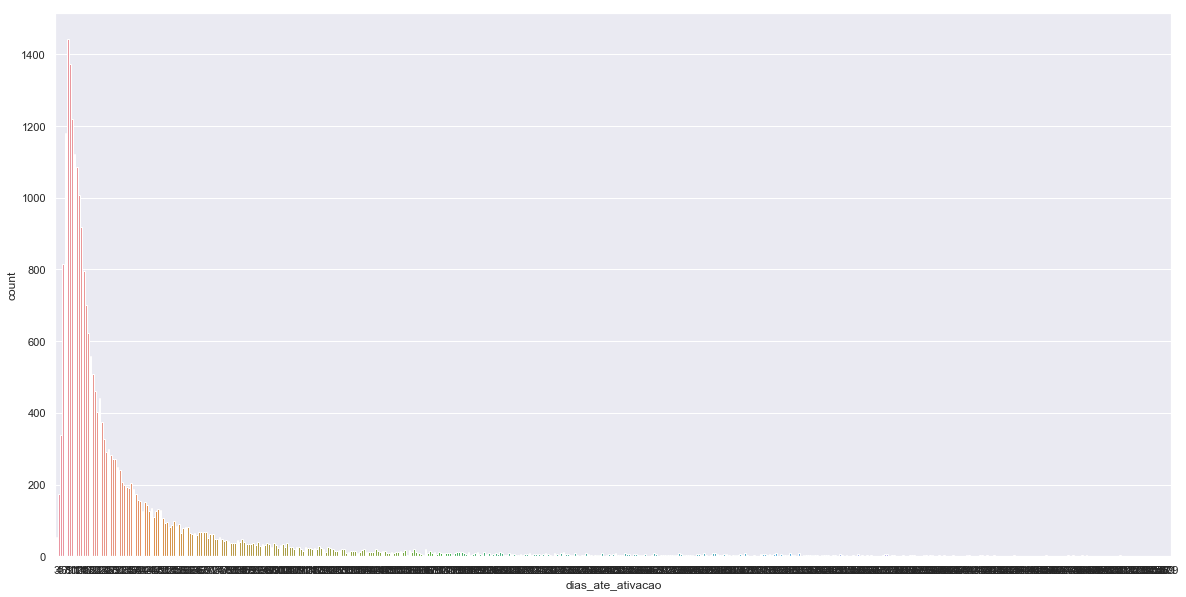

In [0]:
# Representamos graficamente os resultados
plt.figure(figsize=(20,10))
sns.countplot(BASE_CARTOES_TESTE.dias_ate_ativacao)
plt.show()

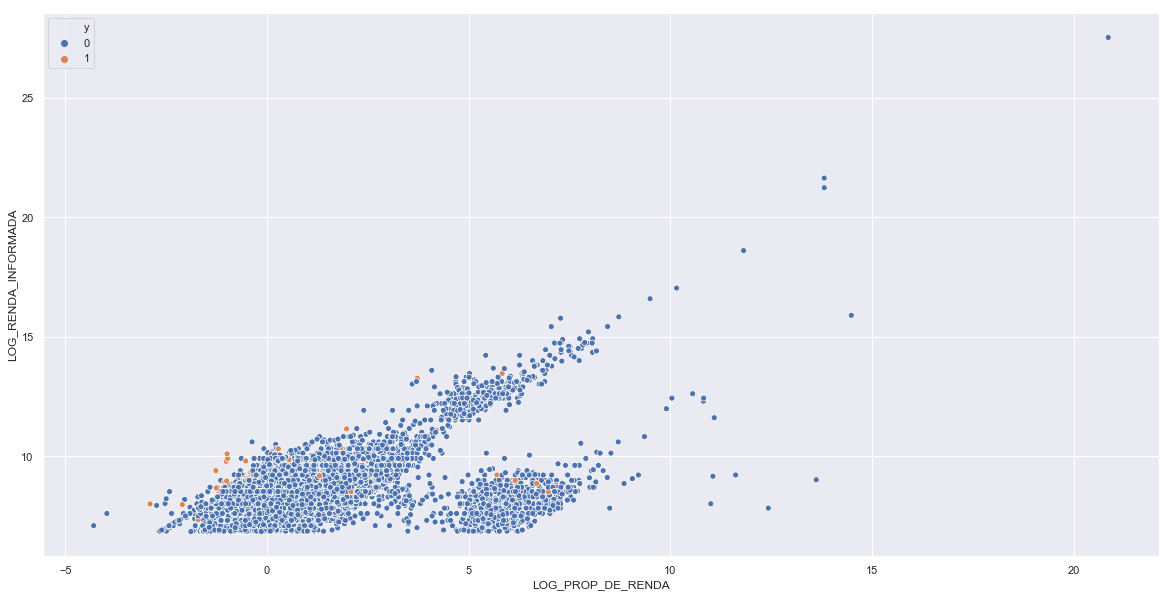

In [0]:
list_FRAUDE = list(BASE_CARTOES_DEV['FRAUDE'])
sns.set(rc={'figure.figsize':(20, 10)})
df_plot = pd.DataFrame(BASE_CARTOES_DEV, columns=['LOG_PROP_DE_RENDA', 'LOG_RENDA_INFORMADA'])
df_plot['y'] = list_FRAUDE
sns.scatterplot('LOG_PROP_DE_RENDA', 'LOG_RENDA_INFORMADA','y',data=df_plot)

In [0]:
BASE_CARTOES_TESTE.head()

,ID,FRAUDE,DT_CONTRATACAO,DATA_ATIVACAO,LIMITE_CREDITO_CARTAO,ORIGEM_VENDA_CONTRATO,DATA_NASCIMENTO_CLIENTE,GENERO,ESTADO_CIVIL,NATURALIDADE,FLAG_CARTAO_ADICIONAL,OPTIN_FATURA_POR_EMAIL,FLAG_VALIDACAO_CADASTRAL,FLAG_EMAIL_INFORMADO,DOMINIO_EMAIL,ESCOLARIDADE,ESCOLARIDADE_BUREAU1,COD_PROFISSAO_BUREAU1,CEP_RESIDENCIAL_INFORMADO,CEP_COMERCIAL_INFORMADO,CEP1_BUREAU1,CEP2_BUREAU1,CEP3_BUREAU1,CEP1_BUREAU2,CEP2_BUREAU2,CEP3_BUREAU2,CEP4_BUREAU2,DDD_CELULAR,DDD_RESIDENCIAL_INFORMADO,DDD_COMERCIAL_INFORMADO,DDD1_BUREAU1,DDD2_BUREAU1,DDD3_BUREAU1,DDD4_BUREAU1,DDD5_BUREAU1,UF_EMISSAO_RG,UF_RESIDENCIAL_INFORMADO,UF_COMERCIAL_INFORMADO,UF1_BUREAU1,UF2_BUREAU1,UF3_BUREAU1,UF4_BUREAU1,UF5_BUREAU1,CIDADE_RESIDENCIAL_INFORMADO,CIDADE1_BUREAU1,CIDADE2_BUREAU1,CIDADE3_BUREAU1,CIDADE4_BUREAU1,CIDADE5_BUREAU1,RENDA_INFORMADA,RENDA_BUREAU1,RENDA_BUREAU2,SCORE_CREDITO_BUREAU1,SCORE_CREDITO_BUREAU2,SCORE_FRAUDE,FLAG_DESENVOLVIMENTO,dias_ate_ativacao,idade_na_contratacao,MATCH_CEP_RESIDENCIAL,MATCH_CEP_COMERCIAL,MATCH_RENDA_BUREAU,PERCT_ACERTO_RENDA_BUREAU,DISTRITO_CEP_INFORMADO,RENDA_VS_LIMITE_CARTAO,LOG_RENDA_INFORMADA,LOG_RENDA_BUREAU1,LOG_RENDA_BUREAU2,LOG_PROP_DE_RENDA,SCORE_FRAUDE_NAN
0,E6524F55,0,2018-06-28,2018-07-12,1050.0,INBOUND,1971-07-07,MASCULINO,NaN,NaN,1,S,S,1,HOTMAIL.COM,NaN,ENSINO MEDIO COMPLETO,521110.0,29221115,NaN,29221115.0,NaN,NaN,29221115.0,29221115.0,26010170.0,29903055.0,27.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,ES,NaN,ES,ES,RJ,ES,ES,GUARAPARI,GUARAPARI,NOVA IGUACU,LINHARES,LINHARES,LINHARES,4200.0,1000.0,3550.0,470.0,629.0,919.0,0,14,47,1,0,0,"0,84523809523809523",29221,4.000000,8.342840,6.907755,8.174703,1.435085,0
1,64A9E7CB,0,2018-06-13,2019-03-27,400.0,OUTBOUND,1992-01-13,FEMININO,CASADO,BRASIELIRA,0,N,N,0,NaN,2 GRAU COMPLETO,NaN,NaN,17350000,17350000.0,17350000.0,NaN,NaN,17350000.0,17350000.0,18618028.0,18640000.0,14.0,14.0,14.0,0.0,0.0,0.0,0.0,0.0,NaN,SP,SP,SP,SP,SP,SP,SP,IGARACU DO TIETE,IGARACU DO TIETE,BOTUCATU,PARDINHO,IGARACU DO TIETE,IGARACU DO TIETE,1500.0,886.0,1350.0,509.0,349.0,685.0,0,287,26,1,1,0,"0,90000000000000002",1735,3.750000,7.313220,6.786717,7.207860,0.526503,0
2,4E4A755A,0,2018-04-06,2018-04-22,375.0,INBOUND,1989-06-18,MASCULINO,NaN,NaN,0,S,S,1,GMAIL.COM,NaN,NaN,NaN,49031040,NaN,NaN,NaN,NaN,49072370.0,49072370.0,49090430.0,49090430.0,79.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,SE,NaN,SE,SE,SE,SE,NaN,ARACAJU,ARACAJU,ARACAJU,ARACAJU,NaN,NaN,3000.0,1073.0,1250.0,566.0,563.0,NaN,0,16,29,0,0,0,"0,41666666666666669",49031,8.000000,8.006368,6.978214,7.130899,1.028154,1
3,A9E66169,0,2018-04-29,2018-07-18,2550.0,INBOUND,1958-01-23,FEMININO,NaN,NaN,0,S,S,1,GMAIL.COM,NaN,NaN,NaN,9852440,NaN,9842000.0,NaN,NaN,9842000.0,9842000.0,9852500.0,9852440.0,11.0,11.0,NaN,11.0,11.0,0.0,0.0,0.0,NaN,SP,NaN,SP,SP,SP,SP,SP,SAO BERNARDO DO CAMPO,SAO BERNARDO DO CAMPO,SAO BERNARDO DO CAMPO,SAO BERNARDO DO CAMPO,SAO BERNARDO DO CAMPO,SAO BERNARDO DO CAMPO,4500.0,2144.0,1600.0,847.0,850.0,815.0,0,80,60,1,0,0,"0,47644444444444445",9852,1.764706,8.411833,7.670429,7.377759,0.741404,0
4,1E3ABBE1,0,2018-05-11,2018-06-01,375.0,INBOUND,1976-01-08,FEMININO,NaN,NaN,0,S,S,1,OUTLOOK.COM,NaN,NaN,NaN,55158370,NaN,7230350.0,NaN,NaN,7230340.0,7230340.0,55158370.0,7230340.0,81.0,81.0,NaN,21.0,21.0,81.0,11.0,0.0,NaN,PE,NaN,SP,SP,PE,SP,PE,BELO JARDIM,GUARULHOS,BELO JARDIM,GUARULHOS,BELO JARDIM,BELO JARDIM,2500.0,788.0,1250.0,678.0,521.0,NaN,0,21,42,1,0,0,"0,5",55158,6.666667,7.824046,6.669498,7.130899,1.154548,1


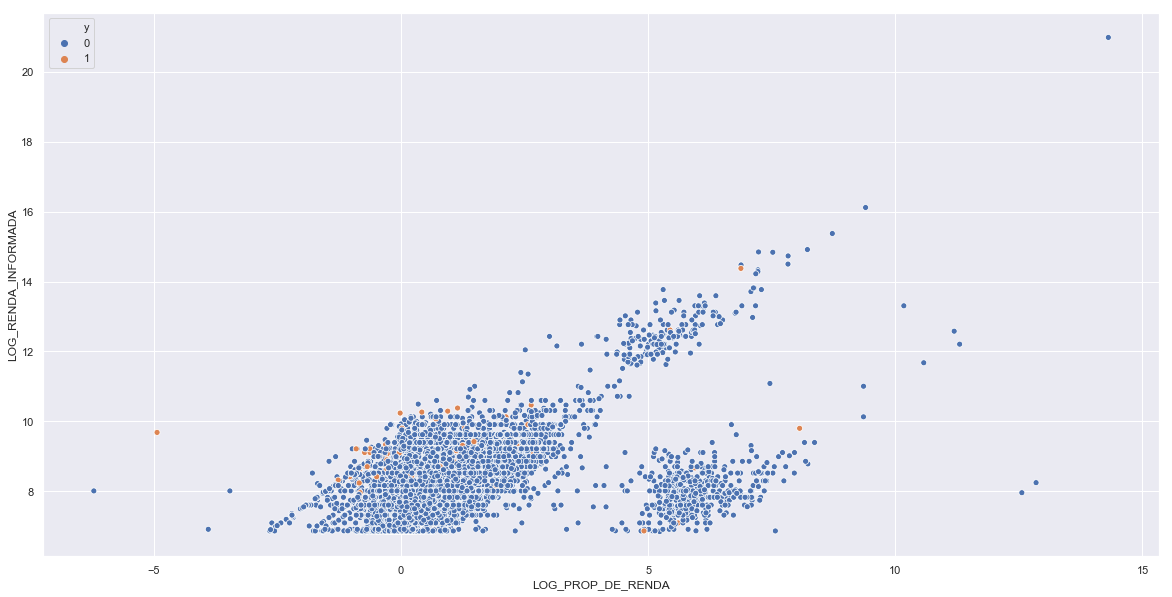

In [0]:
list_FRAUDE = list(BASE_CARTOES_TESTE['FRAUDE'])
sns.set(rc={'figure.figsize':(20, 10)})
df_plot = pd.DataFrame(BASE_CARTOES_TESTE, columns=['LOG_PROP_DE_RENDA', 'LOG_RENDA_INFORMADA'])
df_plot['y'] = list_FRAUDE
sns.scatterplot('LOG_PROP_DE_RENDA', 'LOG_RENDA_INFORMADA','y',data=df_plot)

In [0]:
BASE_CARTOES_TESTE['SCORE_FRAUDE'] = BASE_CARTOES_TESTE.SCORE_FRAUDE.fillna(BASE_CARTOES_TESTE.SCORE_FRAUDE.mean())
BASE_CARTOES_DEV['SCORE_FRAUDE'] = BASE_CARTOES_DEV.SCORE_FRAUDE.fillna(BASE_CARTOES_DEV.SCORE_FRAUDE.mean())

In [0]:
BASE_CARTOES_DEV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60591 entries, 0 to 60590
Data columns (total 69 columns):
ID                              60591 non-null object
FRAUDE                          60591 non-null int64
DT_CONTRATACAO                  60591 non-null datetime64[ns]
DATA_ATIVACAO                   60591 non-null datetime64[ns]
LIMITE_CREDITO_CARTAO           60591 non-null float64
ORIGEM_VENDA_CONTRATO           60591 non-null object
DATA_NASCIMENTO_CLIENTE         60591 non-null datetime64[ns]
GENERO                          60591 non-null object
ESTADO_CIVIL                    17287 non-null object
NATURALIDADE                    16237 non-null object
FLAG_CARTAO_ADICIONAL           60591 non-null int64
OPTIN_FATURA_POR_EMAIL          60591 non-null object
FLAG_VALIDACAO_CADASTRAL        60591 non-null object
FLAG_EMAIL_INFORMADO            60591 non-null int64
DOMINIO_EMAIL                   46899 non-null object
ESCOLARIDADE                    16815 non-null object
ESCOL

In [0]:
#BASE_CARTOES_TRAIN = BASE_CARTOES[BASE_CARTOES.FLAG_DESENVOLVIMENTO == 1]
#BASE_CARTOES_TEST = BASE_CARTOES[BASE_CARTOES.FLAG_DESENVOLVIMENTO == 0]
#print("Treino:")
#print(BASE_CARTOES_TRAIN.FRAUDE.value_counts())
#print("Teste:")
#print(BASE_CARTOES_TEST.FRAUDE.value_counts())  
pd.options.display.max_columns = None

In [0]:
BASE_CARTOES_DEV['LOG_SCORE_FRAUDE']   = np.log(BASE_CARTOES_DEV['SCORE_FRAUDE'])

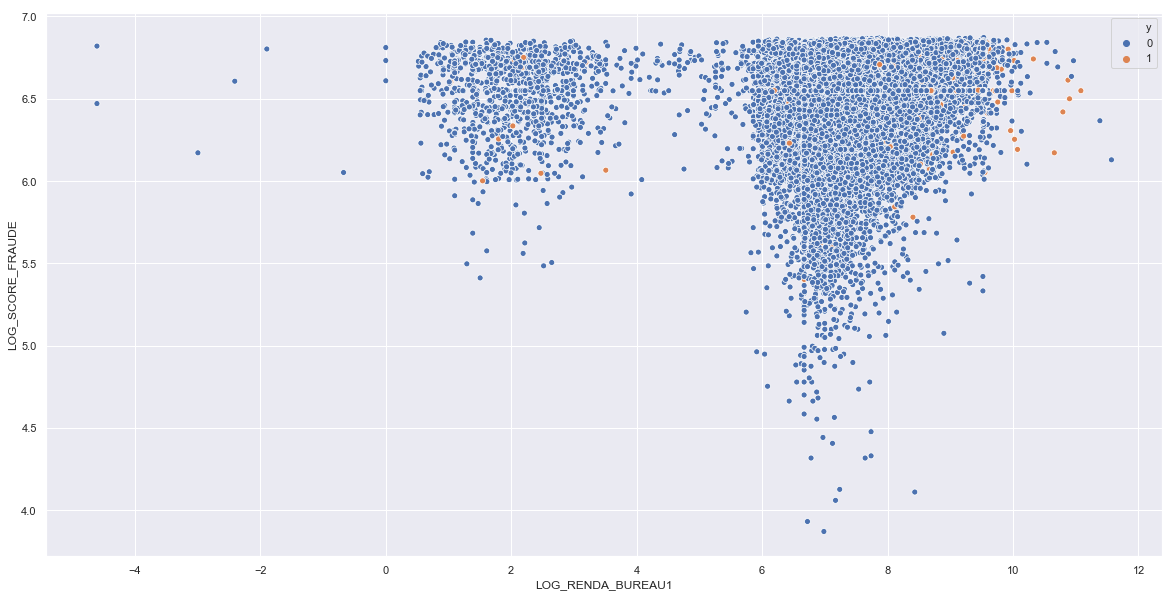

In [0]:
list_FRAUDE = list(BASE_CARTOES_DEV['FRAUDE'])
sns.set(rc={'figure.figsize':(20, 10)})
df_plot = pd.DataFrame(BASE_CARTOES_DEV, columns=['LOG_RENDA_BUREAU1', 'LOG_SCORE_FRAUDE'])
df_plot['y'] = list_FRAUDE
sns.scatterplot('LOG_RENDA_BUREAU1', 'LOG_SCORE_FRAUDE','y',data=df_plot)

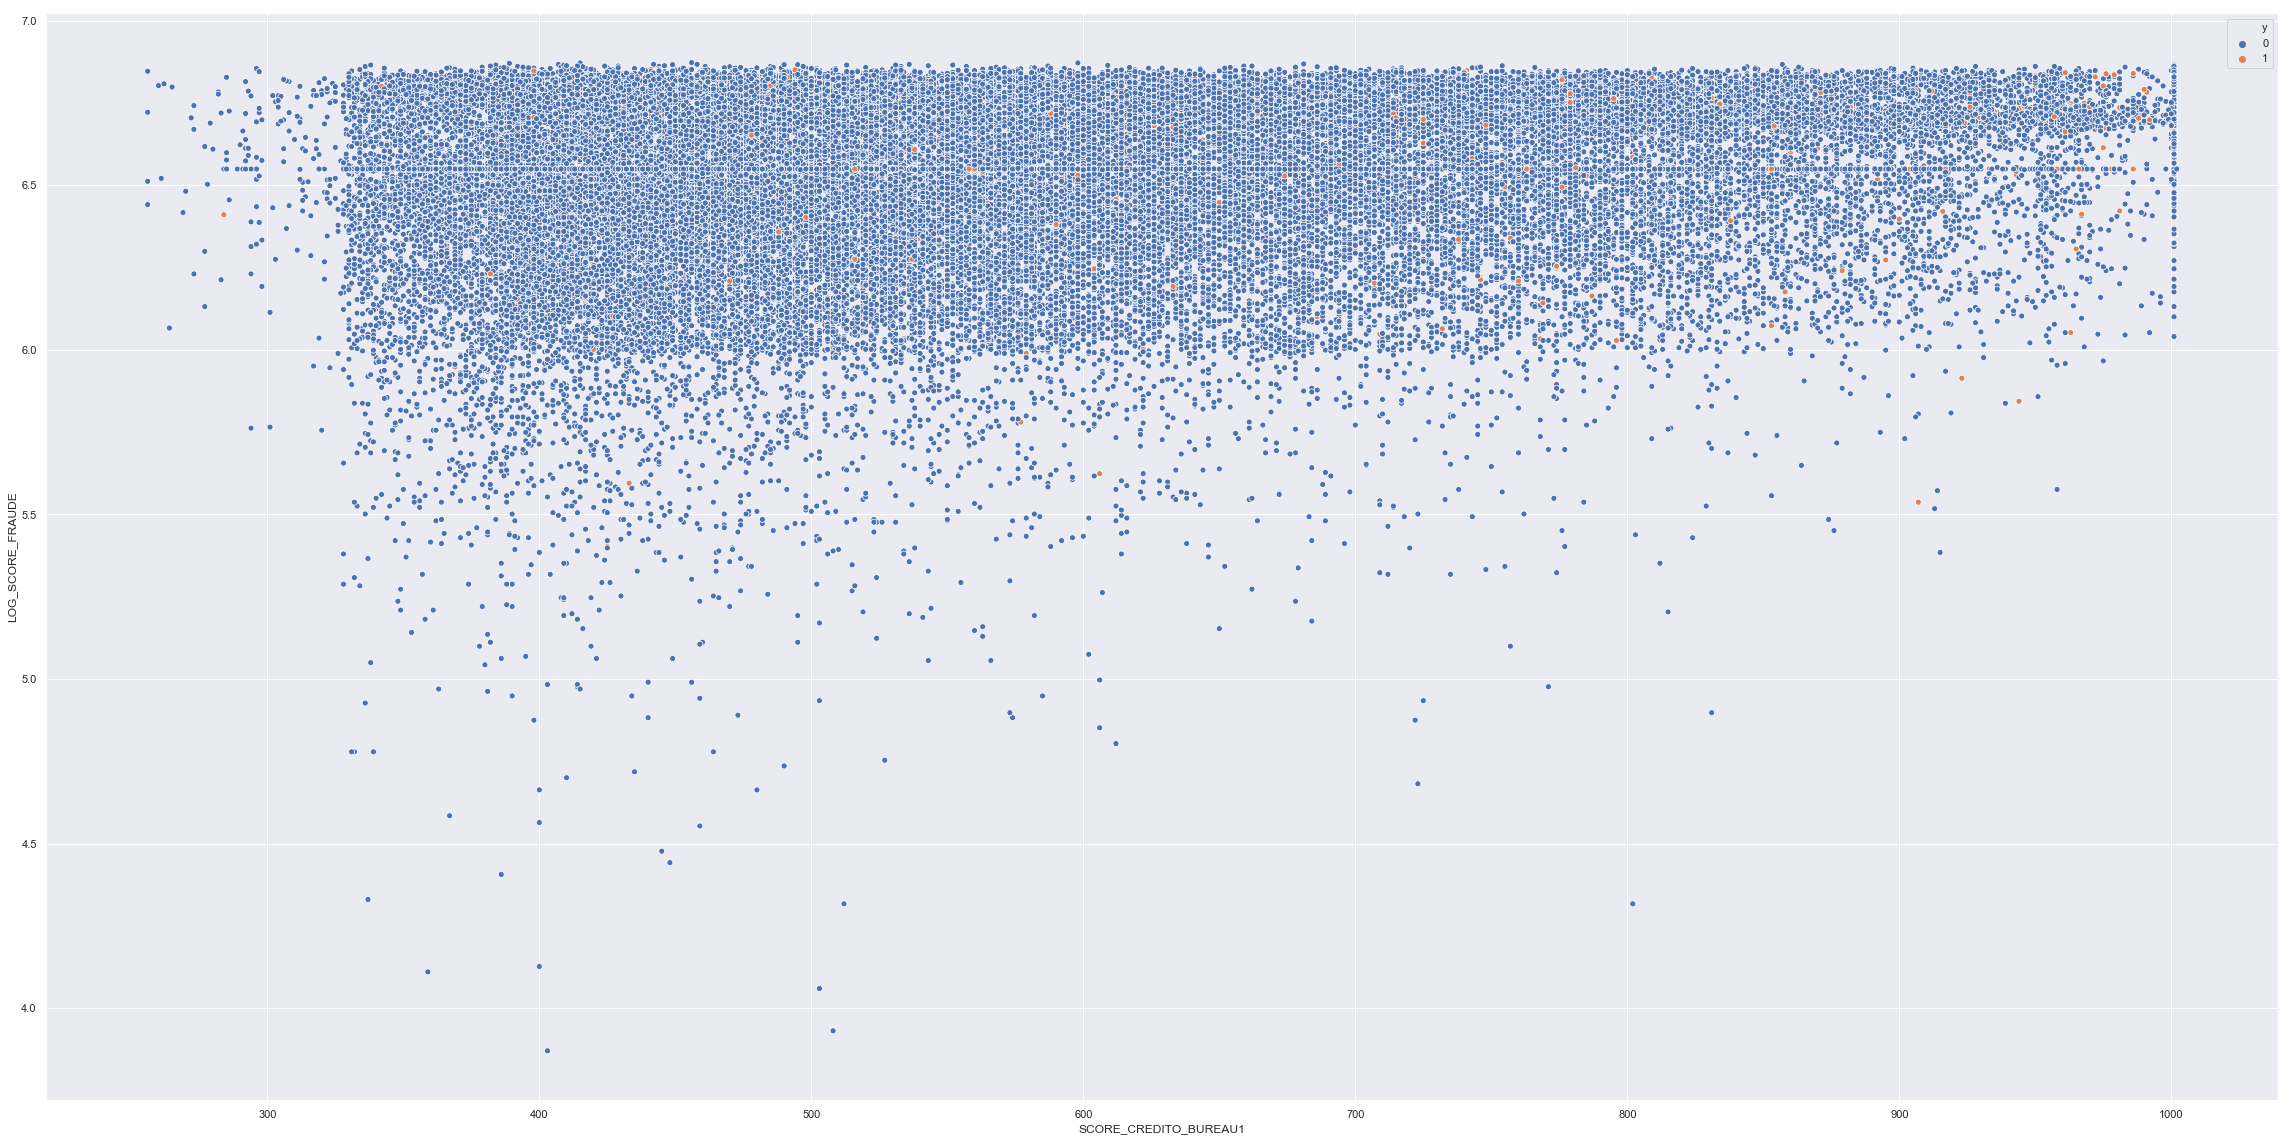

In [0]:
list_FRAUDE = list(BASE_CARTOES_DEV['FRAUDE'])
sns.set(rc={'figure.figsize':(40, 20)})
df_plot = pd.DataFrame(BASE_CARTOES_DEV, columns=['SCORE_CREDITO_BUREAU1', 'LOG_SCORE_FRAUDE'])
df_plot['y'] = list_FRAUDE
sns.scatterplot('SCORE_CREDITO_BUREAU1', 'LOG_SCORE_FRAUDE','y',data=df_plot)

In [0]:
BASE_ATRASOS_TESTE.describe()

,MDA,QTD_ATRASOS_ATE_30,QTD_ATRASOS_ATE_60,QTD_ATRASOS_ATE_90,QTD_ATRASOS_ATE_120,QTD_MESES_RELACIONAMENTO,QTD_PAGTO_EM_DIA,FLAG_DESENVOLVIMENTO
count,25182.000000,25182.000000,25182.000000,25182.00000,25182.000000,25182.000000,25182.000000,25182.0
mean,31.103685,0.889445,0.630212,0.46430,0.330434,7.600429,5.717536,0.0
std,64.446078,2.112745,1.738842,1.43406,1.160272,2.791168,3.067317,0.0
min,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.00000,0.000000,6.000000,3.000000,0.0
50%,0.000000,0.000000,0.000000,0.00000,0.000000,8.000000,6.000000,0.0
75%,19.000000,0.000000,0.000000,0.00000,0.000000,10.000000,8.000000,0.0
max,360.000000,12.000000,10.000000,9.00000,8.000000,13.000000,13.000000,0.0


In [0]:
BASE_CARTOES_TESTE.describe()

,FRAUDE,LIMITE_CREDITO_CARTAO,FLAG_CARTAO_ADICIONAL,FLAG_EMAIL_INFORMADO,COD_PROFISSAO_BUREAU1,CEP_RESIDENCIAL_INFORMADO,CEP_COMERCIAL_INFORMADO,CEP1_BUREAU1,CEP2_BUREAU1,CEP3_BUREAU1,CEP1_BUREAU2,CEP2_BUREAU2,CEP3_BUREAU2,CEP4_BUREAU2,DDD_CELULAR,DDD_RESIDENCIAL_INFORMADO,DDD_COMERCIAL_INFORMADO,DDD1_BUREAU1,DDD2_BUREAU1,DDD3_BUREAU1,DDD4_BUREAU1,DDD5_BUREAU1,RENDA_INFORMADA,RENDA_BUREAU1,RENDA_BUREAU2,SCORE_CREDITO_BUREAU1,SCORE_CREDITO_BUREAU2,SCORE_FRAUDE,FLAG_DESENVOLVIMENTO,dias_ate_ativacao,idade_na_contratacao,MATCH_CEP_RESIDENCIAL,MATCH_CEP_COMERCIAL,MATCH_RENDA_BUREAU,DISTRITO_CEP_INFORMADO,RENDA_VS_LIMITE_CARTAO,LOG_RENDA_INFORMADA,LOG_RENDA_BUREAU1,LOG_RENDA_BUREAU2,LOG_PROP_DE_RENDA
count,25967.000000,25967.000000,25967.000000,25967.000000,20042.000000,2.596700e+04,1.840600e+04,2.368300e+04,2.143000e+03,1.909000e+03,2.569000e+04,2.569000e+04,2.454300e+04,2.224800e+04,25674.000000,23759.000000,10951.000000,25865.000000,25690.000000,24543.000000,22248.000000,19144.000000,2.596700e+04,2.596200e+04,25894.000000,25921.000000,17412.000000,25967.000000,25967.0,25967.000000,25967.000000,25967.000000,25967.000000,25967.000000,25967.000000,2.596700e+04,2.596700e+04,2.596200e+04,2.589400e+04,2.596200e+04
mean,0.006778,1206.805599,0.090846,0.774213,492359.009979,3.569996e+07,3.667518e+07,3.458359e+07,3.298011e+07,3.275967e+07,3.536612e+07,3.536612e+07,3.575900e+07,3.609626e+07,35.666628,35.278884,40.778833,28.328281,17.220942,12.736096,11.106706,10.507522,5.705168e+04,1.998904e+03,2477.106627,595.599707,626.212440,699.644700,0.0,41.681634,41.711018,0.801479,0.551277,0.018408,33282.136327,inf,-inf,-inf,-inf,NaN
std,0.082050,1154.713831,0.287396,0.418107,202677.732649,2.900074e+07,2.898715e+07,2.890374e+07,2.860694e+07,2.835453e+07,2.904759e+07,2.904759e+07,2.918480e+07,2.932265e+07,26.961369,26.799461,27.990146,26.559108,24.216101,21.599966,20.878786,20.412231,8.067799e+06,1.673973e+04,9860.757734,164.660572,143.731489,154.868941,0.0,66.227359,11.653158,0.398894,0.497373,0.134424,31118.932427,NaN,NaN,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,2236.000000,1.001000e+06,1.001000e+06,0.000000e+00,1.103010e+06,1.109010e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,26.000000,0.000000,0.0,3.000000,18.000000,0.000000,0.000000,0.000000,1001.000000,0.000000e+00,-inf,-inf,-inf,-inf
25%,0.000000,475.000000,0.000000,1.000000,410105.000000,1.130000e+07,1.195250e+07,9.613045e+06,9.390265e+06,9.422500e+06,9.911312e+06,9.911312e+06,1.104006e+07,1.134258e+07,11.000000,11.000000,15.000000,11.000000,0.000000,0.000000,0.000000,0.000000,1.800000e+03,9.410000e+02,1350.000000,464.000000,522.000000,592.500000,0.0,10.000000,33.000000,1.000000,0.000000,0.000000,4060.000000,1.684211e+00,7.495542e+00,6.846943e+00,7.207860e+00,1.930752e-01
50%,0.000000,750.000000,0.000000,1.000000,511215.000000,2.558002e+07,2.660000e+07,2.433018e+07,2.271068e+07,2.274030e+07,2.503546e+07,2.503546e+07,2.561516e+07,2.590000e+07,21.000000,21.000000,31.000000,18.000000,11.000000,0.000000,0.000000,0.000000,2.600000e+03,1.296000e+03,1650.000000,566.000000,621.000000,699.644700,0.0,18.000000,40.000000,1.000000,1.000000,0.000000,25580.000000,3.368421e+00,7.863267e+00,7.167038e+00,7.408531e+00,5.813077e-01
75%,0.000000,1500.000000,0.000000,1.000000,623110.000000,6.073040e+07,6.247500e+07,6.001319e+07,5.707249e+07,5.476842e+07,6.044074e+07,6.044074e+07,6.076402e+07,6.243000e+07,61.000000,61.000000,66.000000,43.000000,21.000000,15.000000,11.000000,11.000000,4.023000e+03,2.000000e+03,2300.000000,717.000000,729.000000,825.000000,0.0,40.000000,49.000000,1.000000,1.000000,0.000000,60730.000000,5.037037e+00,8.299782e+00,7.600902e+00,7.740664e+00,1.082178e+00
max,1.000000,22000.000000,1.000000,1.000000,992225.000000,9.989000e+07,9.989000e+07,9.989000e+07,9.901012e+07,9.901012e+07,9.989000e+07,9.989000e+07,9.997000e+07,9.986000e+07,99.000000,99.000000,99.000

#MODELAGEM - MACHINE LEARNING

In [0]:
#train = pd.read_csv('CARTOES_ATRASO_DEV_v7.txt', sep=';', encoding='ISO-8859-2')
#test = pd.read_csv('CARTOES_ATRASO_TESTE_v7.txt', sep=';', encoding='ISO-8859-2')

train = BASE_CARTOES_DEV
test = BASE_CARTOES_TESTE

In [0]:
train.drop('FLAG_DESENVOLVIMENTO', axis=1, inplace=True)
test.drop('FLAG_DESENVOLVIMENTO', axis=1, inplace=True)

In [0]:
list(train.columns)

## Processamento dos dados
Features numericas

In [0]:
def set_numeric(df):
  x_columns = [
     'LIMITE_CREDITO_CARTAO',
     'RENDA_INFORMADA',
     'RENDA_BUREAU1',
     'RENDA_BUREAU2',
     'SCORE_CREDITO_BUREAU1',
     'SCORE_CREDITO_BUREAU2',
     'SCORE_FRAUDE',
     'dias_ate_ativacao',
     'idade_na_contratacao',
     'PERCT_ACERTO_RENDA_BUREAU',
     'DISTRITO_CEP_INFORMADO',
     'MDA',
     'PERC_PAGTO',
     'QTD_ATRASOS_ATE_120',
     'QTD_ATRASOS_ATE_30',
     'QTD_ATRASOS_ATE_60',
     'QTD_ATRASOS_ATE_90',
     'QTD_MESES_RELACIONAMENTO',
     'QTD_PAGTO_EM_DIA',
     'AVG_QT_TRANSACOES_DIA_RESTAURANTE',
     'AVG_VL_TRANSACAO_DIA_RESTAURANTE',
     'DESV_QT_TRANSACOES_DIA_RESTAURANTE',
     'DESV_SUM_VL_TRANSACAO_DIA_RESTAURANTE',
     'AVG_QT_TRANSACOES_DIA_AEREAS',
     'AVG_VL_TRANSACAO_DIA_AEREAS',
     'DESV_QT_TRANSACOES_DIA_AEREAS',
     'DESV_SUM_VL_TRANSACAO_DIA_AEREAS',
     'AVG_QT_TRANSACOES_DIA_SUPERMERCADO',
     'AVG_VL_TRANSACAO_DIA_SUPERMERCADO',
     'DESV_QT_TRANSACOES_DIA_SUPERMERCADO',
     'DESV_SUM_VL_TRANSACAO_DIA_SUPERMERCADO',
     'AVG_QT_TRANSACOES_DIA_SERVICO',
     'AVG_VL_TRANSACAO_DIA_SERVICO',
     'DESV_QT_TRANSACOES_DIA_SERVICO',
     'DESV_SUM_VL_TRANSACAO_DIA_SERVICO',
     'AVG_QT_TRANSACOES_DIA_HOSPITAL',
     'AVG_VL_TRANSACAO_DIA_HOSPITAL',
     'DESV_QT_TRANSACOES_DIA_HOSPITAL',
     'DESV_SUM_VL_TRANSACAO_DIA_HOSPITAL',
     'AVG_QT_TRANSACOES_DIA_AL_CARROS',
     'AVG_VL_TRANSACAO_DIA_AL_CARROS',
     'DESV_QT_TRANSACOES_DIA_AL_CARROS',
     'DESV_SUM_VL_TRANSACAO_DIA_AL_CARROS',
     'AVG_QT_TRANSACOES_DIA_posto',
     'AVG_VL_TRANSACAO_DIA_posto',
     'DESV_QT_TRANSACOES_DIA_posto',
     'DESV_SUM_VL_TRANSACAO_DIA_posto',
     'AVG_QT_TRANSACOES_DIA_TRANS_FINAN',
     'AVG_VL_TRANSACAO_DIA_TRANS_FINAN',
     'DESV_QT_TRANSACOES_DIA_TRANS_FINAN',
     'DESV_SUM_VL_TRANSACAO_DIA_TRANS_FINAN',
     'AVG_QT_TRANSACOES_DIA_TRANS_AUTO',
     'AVG_VL_TRANSACAO_DIA_TRANS_AUTO',
     'DESV_QT_TRANSACOES_DIA_TRANS_AUTO',
     'DESV_SUM_VL_TRANSACAO_DIA_TRANS_AUTO',
     'AVG_PER_COMERCIAL_avg_dif_min_transact',
     'AVG_PER_COMERCIAL_DIAS_INATIVO',
     'AVG_PER_COMERCIAL_MAX_LM_DISPONIVEL',
     'AVG_PER_COMERCIAL_MIN_LM_DISPONIVEL',
     'AVG_PER_COMERCIAL_QT_COMPRAS_INTERNACIONAL',
     'AVG_PER_COMERCIAL_QT_TRANSACOES_APROVADAS',
     'AVG_PER_COMERCIAL_QT_TRANSACOES_DIA',
     'AVG_PER_COMERCIAL_QT_TRANSACOES_DIGITAIS',
     'AVG_PER_COMERCIAL_QT_TRANSACOES_EFETIVADAS',
     'AVG_PER_COMERCIAL_QT_TRANSACOES_PRESENCIAIS',
     'AVG_PER_COMERCIAL_QT_TRANSACOES_REJEITADAS',
     'AVG_PER_COMERCIAL_QT_TRANSACOES_REV',
     'AVG_PER_COMERCIAL_VL_TRANSACAO',
     'DESV_PER_COMERCIAL_avg_dif_min_transact',
     'DESV_PER_COMERCIAL_DIAS_INATIVO',
     'DESV_PER_COMERCIAL_MAX_LM_DISPONIVEL',
     'DESV_PER_COMERCIAL_MIN_LM_DISPONIVEL',
     'DESV_PER_COMERCIAL_QT_COMPRAS_INTERNACIONAL',
     'DESV_PER_COMERCIAL_QT_TRANSACOES_APROVADAS',
     'DESV_PER_COMERCIAL_QT_TRANSACOES_DIA',
     'DESV_PER_COMERCIAL_QT_TRANSACOES_DIGITAIS',
     'DESV_PER_COMERCIAL_QT_TRANSACOES_EFETIVADAS',
     'DESV_PER_COMERCIAL_QT_TRANSACOES_PRESENCIAIS',
     'DESV_PER_COMERCIAL_QT_TRANSACOES_REJEITADAS',
     'DESV_PER_COMERCIAL_QT_TRANSACOES_REV',
     'DESV_PER_COMERCIAL_SUM_VL_TRANSACAO',
     'AVG_N_COMERCIAL_avg_dif_min_transact',
     'AVG_N_COMERCIAL_DIAS_INATIVO',
     'AVG_N_COMERCIAL_MAX_LM_DISPONIVEL',
     'AVG_N_COMERCIAL_MIN_LM_DISPONIVEL',
     'AVG_N_COMERCIAL_QT_COMPRAS_INTERNACIONAL',
     'AVG_N_COMERCIAL_QT_TRANSACOES_APROVADAS',
     'AVG_N_COMERCIAL_QT_TRANSACOES_DIA',
     'AVG_N_COMERCIAL_QT_TRANSACOES_DIGITAIS',
     'AVG_N_COMERCIAL_QT_TRANSACOES_EFETIVADAS',
     'AVG_N_COMERCIAL_QT_TRANSACOES_PRESENCIAIS',
     'AVG_N_COMERCIAL_QT_TRANSACOES_REJEITADAS',
     'AVG_N_COMERCIAL_QT_TRANSACOES_REV',
     'AVG_N_COMERCIAL_VL_TRANSACAO',
     'DESV_N_COMERCIAL_avg_dif_min_transact',
     'DESV_N_COMERCIAL_DIAS_INATIVO',
     'DESV_N_COMERCIAL_MAX_LM_DISPONIVEL',
     'DESV_N_COMERCIAL_MIN_LM_DISPONIVEL',
     'DESV_N_COMERCIAL_QT_COMPRAS_INTERNACIONAL',
     'DESV_N_COMERCIAL_QT_TRANSACOES_APROVADAS',
     'DESV_N_COMERCIAL_QT_TRANSACOES_DIA',
     'DESV_N_COMERCIAL_QT_TRANSACOES_DIGITAIS',
     'DESV_N_COMERCIAL_QT_TRANSACOES_EFETIVADAS',
     'DESV_N_COMERCIAL_QT_TRANSACOES_PRESENCIAIS',
     'DESV_N_COMERCIAL_QT_TRANSACOES_REJEITADAS',
     'DESV_N_COMERCIAL_QT_TRANSACOES_REV',
     'DESV_N_COMERCIAL_SUM_VL_TRANSACAO',
     'RENDA_VS_LIMITE_CARTAO',
     'LOG_RENDA_INFORMADA',
     'LOG_RENDA_BUREAU1',
     'LOG_RENDA_BUREAU2',
     'LOG_PROP_DE_RENDA',
     'MATCH_UF',
     'MATCH_CIDADE_RESIDENCIAL',
     'MATCH_DDD_CELULAR',
     'MATCH_DDD_RES',
     'MATCH_DDD_COM'
  ]
  
  for c in x_columns:
    df[c] = df[c].apply(lambda x: float(str(x).replace(',','.')))
  
  return df

def set_categorical(df):
  x_columns = [
     'ORIGEM_VENDA_CONTRATO',
     'GENERO',
     'ESTADO_CIVIL',
     'FLAG_CARTAO_ADICIONAL',
     'OPTIN_FATURA_POR_EMAIL',
     'FLAG_VALIDACAO_CADASTRAL',
     'FLAG_EMAIL_INFORMADO',
     'DOMINIO_EMAIL',
     'ESCOLARIDADE',
     'ESCOLARIDADE_BUREAU1',
     'DDD_CELULAR',
     'DDD_RESIDENCIAL_INFORMADO',
     'DDD_COMERCIAL_INFORMADO',
     'DDD1_BUREAU1',
     'DDD2_BUREAU1',
     'DDD3_BUREAU1',
     'DDD4_BUREAU1',
     'DDD5_BUREAU1',
     'UF_EMISSAO_RG',
     'UF_RESIDENCIAL_INFORMADO',
     'UF_COMERCIAL_INFORMADO',
     'UF1_BUREAU1',
     'UF2_BUREAU1',
     'UF3_BUREAU1',
     'UF4_BUREAU1',
     'UF5_BUREAU1',
     'ESTADO_CIVIL_NAN',
     'NATURALIDADE_NAN',
     'DOMINIO_EMAIL_NAN',
     'ESCOLARIDADE_NAN',
     'CEP_COMERCIAL_INFORMADO_NAN',
     'DDD_CELULAR_NAN',
     'DDD_RESIDENCIAL_INFORMADO_NAN',
     'DDD_COMERCIAL_INFORMADO_NAN',
     'UF_EMISSAO_RG_NAN',
     'UF_COMERCIAL_INFORMADO_NAN',
     'CIDADE_RESIDENCIAL_INFORMADO_NAN',
     'TAB_ATRASO_NAN',
     'MATCH_UF',
     'MATCH_CIDADE_RESIDENCIAL',
     'MATCH_DDD_CELULAR',
     'MATCH_DDD_RES',
     'MATCH_DDD_COM'
  ]
  
  for c in x_columns:
    df[c] = df[c].astype('category')
  
  return pd.get_dummies(df, drop_first=True)

def get_process_features(df):
  x_columns = [
     'LIMITE_CREDITO_CARTAO',
     'ORIGEM_VENDA_CONTRATO',
     'GENERO',
     'ESTADO_CIVIL',
     'NATURALIDADE',
     'FLAG_CARTAO_ADICIONAL',
     'OPTIN_FATURA_POR_EMAIL',
     'FLAG_VALIDACAO_CADASTRAL',
     'FLAG_EMAIL_INFORMADO',
     'DOMINIO_EMAIL',
     'ESCOLARIDADE',
     'ESCOLARIDADE_BUREAU1',
     'DDD_CELULAR',
     'DDD_RESIDENCIAL_INFORMADO',
     'DDD_COMERCIAL_INFORMADO',
     'DDD1_BUREAU1',
     'DDD2_BUREAU1',
     'DDD3_BUREAU1',
     'DDD4_BUREAU1',
     'DDD5_BUREAU1',
     'UF_EMISSAO_RG',
     'UF_RESIDENCIAL_INFORMADO',
     'UF_COMERCIAL_INFORMADO',
     'UF1_BUREAU1',
     'UF2_BUREAU1',
     'UF3_BUREAU1',
     'UF4_BUREAU1',
     'UF5_BUREAU1',
     'RENDA_INFORMADA',
     'RENDA_BUREAU1',
     'RENDA_BUREAU2',
     'SCORE_CREDITO_BUREAU1',
     'SCORE_CREDITO_BUREAU2',
     'SCORE_FRAUDE',
     'dias_ate_ativacao',
     'idade_na_contratacao',
     'MATCH_CEP_RESIDENCIAL',
     'MATCH_CEP_COMERCIAL',
     'MATCH_RENDA_BUREAU',
     'PERCT_ACERTO_RENDA_BUREAU',
     'DISTRITO_CEP_INFORMADO',
     'MDA',
     'PERC_PAGTO',
     'QTD_ATRASOS_ATE_120',
     'QTD_ATRASOS_ATE_30',
     'QTD_ATRASOS_ATE_60',
     'QTD_ATRASOS_ATE_90',
     'QTD_MESES_RELACIONAMENTO',
     'QTD_PAGTO_EM_DIA',
     'AVG_QT_TRANSACOES_DIA_RESTAURANTE',
     'AVG_VL_TRANSACAO_DIA_RESTAURANTE',
     'DESV_QT_TRANSACOES_DIA_RESTAURANTE',
     'DESV_SUM_VL_TRANSACAO_DIA_RESTAURANTE',
     'AVG_QT_TRANSACOES_DIA_AEREAS',
     'AVG_VL_TRANSACAO_DIA_AEREAS',
     'DESV_QT_TRANSACOES_DIA_AEREAS',
     'DESV_SUM_VL_TRANSACAO_DIA_AEREAS',
     'AVG_QT_TRANSACOES_DIA_SUPERMERCADO',
     'AVG_VL_TRANSACAO_DIA_SUPERMERCADO',
     'DESV_QT_TRANSACOES_DIA_SUPERMERCADO',
     'DESV_SUM_VL_TRANSACAO_DIA_SUPERMERCADO',
     'AVG_QT_TRANSACOES_DIA_SERVICO',
     'AVG_VL_TRANSACAO_DIA_SERVICO',
     'DESV_QT_TRANSACOES_DIA_SERVICO',
     'DESV_SUM_VL_TRANSACAO_DIA_SERVICO',
     'AVG_QT_TRANSACOES_DIA_HOSPITAL',
     'AVG_VL_TRANSACAO_DIA_HOSPITAL',
     'DESV_QT_TRANSACOES_DIA_HOSPITAL',
     'DESV_SUM_VL_TRANSACAO_DIA_HOSPITAL',
     'AVG_QT_TRANSACOES_DIA_AL_CARROS',
     'AVG_VL_TRANSACAO_DIA_AL_CARROS',
     'DESV_QT_TRANSACOES_DIA_AL_CARROS',
     'DESV_SUM_VL_TRANSACAO_DIA_AL_CARROS',
     'AVG_QT_TRANSACOES_DIA_posto',
     'AVG_VL_TRANSACAO_DIA_posto',
     'DESV_QT_TRANSACOES_DIA_posto',
     'DESV_SUM_VL_TRANSACAO_DIA_posto',
     'AVG_QT_TRANSACOES_DIA_TRANS_FINAN',
     'AVG_VL_TRANSACAO_DIA_TRANS_FINAN',
     'DESV_QT_TRANSACOES_DIA_TRANS_FINAN',
     'DESV_SUM_VL_TRANSACAO_DIA_TRANS_FINAN',
     'AVG_QT_TRANSACOES_DIA_TRANS_AUTO',
     'AVG_VL_TRANSACAO_DIA_TRANS_AUTO',
     'DESV_QT_TRANSACOES_DIA_TRANS_AUTO',
     'DESV_SUM_VL_TRANSACAO_DIA_TRANS_AUTO',
     'AVG_PER_COMERCIAL_avg_dif_min_transact',
     'AVG_PER_COMERCIAL_DIAS_INATIVO',
     'AVG_PER_COMERCIAL_MAX_LM_DISPONIVEL',
     'AVG_PER_COMERCIAL_MIN_LM_DISPONIVEL',
     'AVG_PER_COMERCIAL_QT_COMPRAS_INTERNACIONAL',
     'AVG_PER_COMERCIAL_QT_TRANSACOES_APROVADAS',
     'AVG_PER_COMERCIAL_QT_TRANSACOES_DIA',
     'AVG_PER_COMERCIAL_QT_TRANSACOES_DIGITAIS',
     'AVG_PER_COMERCIAL_QT_TRANSACOES_EFETIVADAS',
     'AVG_PER_COMERCIAL_QT_TRANSACOES_PRESENCIAIS',
     'AVG_PER_COMERCIAL_QT_TRANSACOES_REJEITADAS',
     'AVG_PER_COMERCIAL_QT_TRANSACOES_REV',
     'AVG_PER_COMERCIAL_VL_TRANSACAO',
     'DESV_PER_COMERCIAL_avg_dif_min_transact',
     'DESV_PER_COMERCIAL_DIAS_INATIVO',
     'DESV_PER_COMERCIAL_MAX_LM_DISPONIVEL',
     'DESV_PER_COMERCIAL_MIN_LM_DISPONIVEL',
     'DESV_PER_COMERCIAL_QT_COMPRAS_INTERNACIONAL',
     'DESV_PER_COMERCIAL_QT_TRANSACOES_APROVADAS',
     'DESV_PER_COMERCIAL_QT_TRANSACOES_DIA',
     'DESV_PER_COMERCIAL_QT_TRANSACOES_DIGITAIS',
     'DESV_PER_COMERCIAL_QT_TRANSACOES_EFETIVADAS',
     'DESV_PER_COMERCIAL_QT_TRANSACOES_PRESENCIAIS',
     'DESV_PER_COMERCIAL_QT_TRANSACOES_REJEITADAS',
     'DESV_PER_COMERCIAL_QT_TRANSACOES_REV',
     'DESV_PER_COMERCIAL_SUM_VL_TRANSACAO',
     'AVG_N_COMERCIAL_avg_dif_min_transact',
     'AVG_N_COMERCIAL_DIAS_INATIVO',
     'AVG_N_COMERCIAL_MAX_LM_DISPONIVEL',
     'AVG_N_COMERCIAL_MIN_LM_DISPONIVEL',
     'AVG_N_COMERCIAL_QT_COMPRAS_INTERNACIONAL',
     'AVG_N_COMERCIAL_QT_TRANSACOES_APROVADAS',
     'AVG_N_COMERCIAL_QT_TRANSACOES_DIA',
     'AVG_N_COMERCIAL_QT_TRANSACOES_DIGITAIS',
     'AVG_N_COMERCIAL_QT_TRANSACOES_EFETIVADAS',
     'AVG_N_COMERCIAL_QT_TRANSACOES_PRESENCIAIS',
     'AVG_N_COMERCIAL_QT_TRANSACOES_REJEITADAS',
     'AVG_N_COMERCIAL_QT_TRANSACOES_REV',
     'AVG_N_COMERCIAL_VL_TRANSACAO',
     'DESV_N_COMERCIAL_avg_dif_min_transact',
     'DESV_N_COMERCIAL_DIAS_INATIVO',
     'DESV_N_COMERCIAL_MAX_LM_DISPONIVEL',
     'DESV_N_COMERCIAL_MIN_LM_DISPONIVEL',
     'DESV_N_COMERCIAL_QT_COMPRAS_INTERNACIONAL',
     'DESV_N_COMERCIAL_QT_TRANSACOES_APROVADAS',
     'DESV_N_COMERCIAL_QT_TRANSACOES_DIA',
     'DESV_N_COMERCIAL_QT_TRANSACOES_DIGITAIS',
     'DESV_N_COMERCIAL_QT_TRANSACOES_EFETIVADAS',
     'DESV_N_COMERCIAL_QT_TRANSACOES_PRESENCIAIS',
     'DESV_N_COMERCIAL_QT_TRANSACOES_REJEITADAS',
     'DESV_N_COMERCIAL_QT_TRANSACOES_REV',
     'DESV_N_COMERCIAL_SUM_VL_TRANSACAO',
     'SCORE_FRAUDE_NAN',
     'ESTADO_CIVIL_NAN',
     'NATURALIDADE_NAN',
     'DOMINIO_EMAIL_NAN',
     'ESCOLARIDADE_NAN',
     'CEP_COMERCIAL_INFORMADO_NAN',
     'DDD_CELULAR_NAN',
     'DDD_RESIDENCIAL_INFORMADO_NAN',
     'DDD_COMERCIAL_INFORMADO_NAN',
     'UF_EMISSAO_RG_NAN',
     'UF_COMERCIAL_INFORMADO_NAN',
     'CIDADE_RESIDENCIAL_INFORMADO_NAN',
     'TAB_ATRASO_NAN',
     'RENDA_VS_LIMITE_CARTAO',
     'LOG_RENDA_INFORMADA',
     'LOG_RENDA_BUREAU1',
     'LOG_RENDA_BUREAU2',
     'LOG_PROP_DE_RENDA',
     'MATCH_UF',
     'MATCH_CIDADE_RESIDENCIAL',
     'MATCH_DDD_CELULAR',
     'MATCH_DDD_RES',
     'MATCH_DDD_COM'
  ]
  
  y_column = 'FRAUDE'
  
  return set_categorical(set_numeric(df[x_columns])), df[y_column]

In [0]:
X_train, y_train = get_process_features(train)
X_test, y_test = get_process_features(test)

In [0]:
columns = list(set(X_test.columns).intersection(X_train.columns))

In [0]:
X_train = X_train[columns].fillna(0)
X_test = X_test[columns].fillna(0)

X_train = X_train.replace([np.inf, -np.inf], 0)
X_test = X_test.replace([np.inf, -np.inf], 0)

## Modelagem

In [0]:
import xgboost as xgb
from sklearn.metrics import roc_auc_score
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier

Features com maior contrubuição para o modelo

In [0]:
columns_importance = ['dias_ate_ativacao',
 'QTD_MESES_RELACIONAMENTO',
 'SCORE_CREDITO_BUREAU1',
 'SCORE_CREDITO_BUREAU2',
 'SCORE_FRAUDE',
 'QTD_PAGTO_EM_DIA',
 'FLAG_VALIDACAO_CADASTRAL_S',
 'idade_na_contratacao',
 'MDA',
 'DESV_PER_COMERCIAL_QT_TRANSACOES_REJEITADAS',
 'DESV_PER_COMERCIAL_QT_TRANSACOES_APROVADAS',
 'AVG_PER_COMERCIAL_VL_TRANSACAO',
 'DISTRITO_CEP_INFORMADO',
 'AVG_PER_COMERCIAL_DIAS_INATIVO',
 'LOG_RENDA_BUREAU1',
 'DESV_PER_COMERCIAL_MIN_LM_DISPONIVEL',
 'DESV_PER_COMERCIAL_DIAS_INATIVO',
 'AVG_N_COMERCIAL_VL_TRANSACAO',
 'LOG_PROP_DE_RENDA',
 'DESV_PER_COMERCIAL_SUM_VL_TRANSACAO',
 'AVG_PER_COMERCIAL_MAX_LM_DISPONIVEL',
 'LIMITE_CREDITO_CARTAO',
 'DESV_N_COMERCIAL_DIAS_INATIVO',
 'RENDA_INFORMADA',
 'AVG_VL_TRANSACAO_DIA_SUPERMERCADO',
 'RENDA_VS_LIMITE_CARTAO',
 'PERC_PAGTO',
 'DESV_N_COMERCIAL_avg_dif_min_transact',
 'DESV_N_COMERCIAL_SUM_VL_TRANSACAO',
 'DESV_SUM_VL_TRANSACAO_DIA_SUPERMERCADO',
 'RENDA_BUREAU2',
 'AVG_PER_COMERCIAL_avg_dif_min_transact',
 'PERCT_ACERTO_RENDA_BUREAU',
 'DESV_PER_COMERCIAL_QT_TRANSACOES_EFETIVADAS',
 'AVG_N_COMERCIAL_avg_dif_min_transact',
 'DESV_PER_COMERCIAL_avg_dif_min_transact',
 'AVG_N_COMERCIAL_DIAS_INATIVO',
 'DESV_SUM_VL_TRANSACAO_DIA_SERVICO',
 'AVG_N_COMERCIAL_MIN_LM_DISPONIVEL',
 'AVG_VL_TRANSACAO_DIA_SERVICO',
 'DESV_N_COMERCIAL_MAX_LM_DISPONIVEL',
 'AVG_VL_TRANSACAO_DIA_posto',
 'AVG_VL_TRANSACAO_DIA_RESTAURANTE',
 'DESV_PER_COMERCIAL_QT_TRANSACOES_PRESENCIAIS',
 'DESV_N_COMERCIAL_QT_TRANSACOES_REJEITADAS',
 'DESV_SUM_VL_TRANSACAO_DIA_posto',
 'GENERO_MASCULINO',
 'DOMINIO_EMAIL_HOTMAIL.COM',
 'NATURALIDADE_SAO PAULO',
 'DESV_PER_COMERCIAL_MAX_LM_DISPONIVEL',
 'FLAG_CARTAO_ADICIONAL_1',
 'DESV_SUM_VL_TRANSACAO_DIA_RESTAURANTE',
 'DDD1_BUREAU1_31.0',
 'MATCH_DDD_RES_1.0',
 'DESV_N_COMERCIAL_QT_TRANSACOES_EFETIVADAS',
 'AVG_PER_COMERCIAL_MIN_LM_DISPONIVEL',
 'DESV_N_COMERCIAL_QT_TRANSACOES_APROVADAS',
 'UF3_BUREAU1_MG',
 'MATCH_CEP_COMERCIAL',
 'DESV_PER_COMERCIAL_QT_TRANSACOES_REV',
 'AVG_VL_TRANSACAO_DIA_AL_CARROS',
 'DESV_N_COMERCIAL_MIN_LM_DISPONIVEL',
 'DESV_SUM_VL_TRANSACAO_DIA_TRANS_AUTO',
 'DESV_N_COMERCIAL_QT_TRANSACOES_PRESENCIAIS',
 'DESV_PER_COMERCIAL_QT_TRANSACOES_DIGITAIS',
 'DDD_CELULAR_31.0',
 'MATCH_DDD_CELULAR_1.0',
 'DESV_N_COMERCIAL_QT_COMPRAS_INTERNACIONAL',
 'DDD5_BUREAU1_14.0',
 'DDD5_BUREAU1_31.0',
 'AVG_VL_TRANSACAO_DIA_HOSPITAL',
 'UF5_BUREAU1_MG',
 'DDD_RESIDENCIAL_INFORMADO_NAN_1',
 'DOMINIO_EMAIL_BOL.COM.BR',
 'DDD4_BUREAU1_14.0',
 'DESV_N_COMERCIAL_QT_TRANSACOES_REV',
 'DDD2_BUREAU1_47.0',
 'AVG_QT_TRANSACOES_DIA_HOSPITAL',
 'QTD_ATRASOS_ATE_30',
 'AVG_PER_COMERCIAL_QT_TRANSACOES_PRESENCIAIS',
 'DDD4_BUREAU1_22.0',
 'DESV_N_COMERCIAL_QT_TRANSACOES_DIGITAIS',
 'UF_EMISSAO_RG_SP',
 'DDD4_BUREAU1_31.0',
 'DDD2_BUREAU1_31.0',
 'DOMINIO_EMAIL_GMAIL.COM',
 'AVG_VL_TRANSACAO_DIA_TRANS_AUTO',
 'UF_EMISSAO_RG_GO',
 'UF4_BUREAU1_MG',
 'DOMINIO_EMAIL_YAHOO.COM',
 'AVG_N_COMERCIAL_MAX_LM_DISPONIVEL',
 'DDD_RESIDENCIAL_INFORMADO_83.0',
 'UF_EMISSAO_RG_AL',
 'ESCOLARIDADE_BUREAU1_ALFABETIZADO',
 'RENDA_BUREAU1',
 'DDD3_BUREAU1_11.0',
 'QTD_ATRASOS_ATE_60',
 'DDD5_BUREAU1_11.0',
 'DDD_RESIDENCIAL_INFORMADO_85.0',
 'DESV_PER_COMERCIAL_QT_COMPRAS_INTERNACIONAL',
 'UF_COMERCIAL_INFORMADO_NAN_1',
 'MATCH_CIDADE_RESIDENCIAL_1.0',
 'SCORE_FRAUDE_NAN',
 'DDD2_BUREAU1_35.0',
 'DDD4_BUREAU1_62.0',
 'DDD1_BUREAU1_47.0',
 'NATURALIDADE_PB',
 'AVG_N_COMERCIAL_QT_TRANSACOES_PRESENCIAIS',
 'ESCOLARIDADE_2 GRAU COMPLETO',
 'UF1_BUREAU1_MG',
 'DDD3_BUREAU1_31.0',
 'ESCOLARIDADE_SUPERIOR COMPLETO',
 'UF3_BUREAU1_PB',
 'MATCH_CEP_RESIDENCIAL',
 'DDD_RESIDENCIAL_INFORMADO_11.0',
 'DDD_COMERCIAL_INFORMADO_16.0',
 'AVG_N_COMERCIAL_QT_TRANSACOES_APROVADAS',
 'DDD_CELULAR_83.0',
 'DDD4_BUREAU1_82.0',
 'DDD4_BUREAU1_16.0',
 'ESTADO_CIVIL_SOLTEIRO',
 'DDD4_BUREAU1_15.0',
 'UF5_BUREAU1_RJ',
 'DDD3_BUREAU1_34.0',
 'DDD_COMERCIAL_INFORMADO_NAN_1',
 'DDD1_BUREAU1_11.0',
 'ESTADO_CIVIL_NAN_1',
 'AVG_QT_TRANSACOES_DIA_TRANS_FINAN',
 'NATURALIDADE_DF',
 'DDD_RESIDENCIAL_INFORMADO_19.0',
 'DDD_RESIDENCIAL_INFORMADO_31.0',
 'DDD1_BUREAU1_82.0',
 'DDD_COMERCIAL_INFORMADO_82.0',
 'DDD2_BUREAU1_62.0',
 'AVG_N_COMERCIAL_QT_TRANSACOES_DIGITAIS',
 'DDD_COMERCIAL_INFORMADO_83.0',
 'AVG_QT_TRANSACOES_DIA_SERVICO',
 'DDD_CELULAR_11.0',
 'MATCH_DDD_COM_1.0',
 'DDD5_BUREAU1_47.0',
 'AVG_N_COMERCIAL_QT_COMPRAS_INTERNACIONAL',
 'UF_EMISSAO_RG_NAN_1',
 'UF_COMERCIAL_INFORMADO_SP',
 'DDD3_BUREAU1_47.0',
 'UF_RESIDENCIAL_INFORMADO_MG',
 'DDD2_BUREAU1_11.0',
 'DDD3_BUREAU1_61.0',
 'DDD_RESIDENCIAL_INFORMADO_41.0',
 'ESCOLARIDADE_BUREAU1_ENSINO MEDIO COMPLETO',
 'MATCH_UF_1.0',
 'ESCOLARIDADE_BUREAU1_EDUCACAO SUPERIOR INCOMPLETA',
 'DDD_RESIDENCIAL_INFORMADO_55.0',
 'UF_COMERCIAL_INFORMADO_BA',
 'ESCOLARIDADE_BUREAU1_EDUCACAO SUPERIOR COMPLETA',
 'AVG_QT_TRANSACOES_DIA_SUPERMERCADO',
 'ESCOLARIDADE_BUREAU1_ENSINO FUNDAMENTAL COMPLETO',
 'UF4_BUREAU1_AL',
 'DOMINIO_EMAIL_TERRA.COM.BR',
 'AVG_PER_COMERCIAL_QT_COMPRAS_INTERNACIONAL',
 'DOMINIO_EMAIL_UOL.COM.BR',
 'DDD_COMERCIAL_INFORMADO_62.0',
 'DDD5_BUREAU1_15.0',
 'DDD3_BUREAU1_19.0',
 'DDD5_BUREAU1_62.0',
 'ESCOLARIDADE_BUREAU1_6Âş AO 9Âş ANO DO ENSINO FUNDAMENTAL INCOMPLETO',
 'ORIGEM_VENDA_CONTRATO_OUTBOUND',
 'UF3_BUREAU1_RJ',
 'DDD1_BUREAU1_77.0',
 'AVG_N_COMERCIAL_QT_TRANSACOES_EFETIVADAS',
 'NATURALIDADE_GOIANIA',
 'AVG_PER_COMERCIAL_QT_TRANSACOES_DIGITAIS',
 'AVG_PER_COMERCIAL_QT_TRANSACOES_APROVADAS',
 'AVG_PER_COMERCIAL_QT_TRANSACOES_REJEITADAS',
 'DDD_RESIDENCIAL_INFORMADO_82.0',
 'DDD_COMERCIAL_INFORMADO_15.0',
 'AVG_N_COMERCIAL_QT_TRANSACOES_REJEITADAS',
 'FLAG_EMAIL_INFORMADO_1',
 'AVG_N_COMERCIAL_QT_TRANSACOES_DIA',
 'DDD1_BUREAU1_14.0',
 'DDD_CELULAR_91.0',
 'UF3_BUREAU1_MT',
 'DDD_COMERCIAL_INFORMADO_77.0',
 'DDD_RESIDENCIAL_INFORMADO_13.0',
 'DDD4_BUREAU1_11.0',
 'DDD3_BUREAU1_16.0',
 'AVG_QT_TRANSACOES_DIA_TRANS_AUTO',
 'OPTIN_FATURA_POR_EMAIL_S',
 'UF1_BUREAU1_PR',
 'UF2_BUREAU1_CE',
 'DDD4_BUREAU1_19.0',
 'DDD2_BUREAU1_15.0',
 'DDD4_BUREAU1_47.0',
 'DESV_SUM_VL_TRANSACAO_DIA_AL_CARROS',
 'DDD1_BUREAU1_15.0',
 'ESCOLARIDADE_NĂ\x83O INFORMOU',
 'AVG_VL_TRANSACAO_DIA_AEREAS',
 'UF4_BUREAU1_MT',
 'UF_COMERCIAL_INFORMADO_PR',
 'UF_RESIDENCIAL_INFORMADO_CE',
 'UF2_BUREAU1_RS',
 'UF2_BUREAU1_MS',
 'UF3_BUREAU1_SC',
 'DDD1_BUREAU1_69.0',
 'DDD_RESIDENCIAL_INFORMADO_81.0',
 'DDD_CELULAR_16.0',
 'DOMINIO_EMAIL_NAN_1',
 'DDD3_BUREAU1_69.0',
 'DDD_RESIDENCIAL_INFORMADO_14.0',
 'DDD4_BUREAU1_21.0',
 'DDD_CELULAR_85.0',
 'ESTADO_CIVIL_NAO_INFORMOU',
 'DDD_RESIDENCIAL_INFORMADO_38.0',
 'UF3_BUREAU1_BA',
 'AVG_QT_TRANSACOES_DIA_posto',
 'UF4_BUREAU1_RJ',
 'DDD5_BUREAU1_22.0',
 'DDD_RESIDENCIAL_INFORMADO_21.0',
 'DDD2_BUREAU1_21.0',
 'DDD_CELULAR_19.0',
 'UF3_BUREAU1_PE',
 'DDD_RESIDENCIAL_INFORMADO_27.0',
 'UF5_BUREAU1_SP',
 'DDD_RESIDENCIAL_INFORMADO_62.0',
 'DDD1_BUREAU1_85.0',
 'UF_COMERCIAL_INFORMADO_PB',
 'UF3_BUREAU1_CE',
 'DOMINIO_EMAIL_ICLOUD.COM',
 'UF5_BUREAU1_RO',
 'UF4_BUREAU1_PE',
 'DDD1_BUREAU1_22.0',
 'UF2_BUREAU1_SP',
 'UF3_BUREAU1_AL',
 'DDD_CELULAR_18.0',
 'DDD2_BUREAU1_19.0',
 'UF_COMERCIAL_INFORMADO_AL',
 'UF4_BUREAU1_SP',
 'UF_RESIDENCIAL_INFORMADO_PB',
 'UF_RESIDENCIAL_INFORMADO_GO',
 'DDD1_BUREAU1_35.0',
 'UF5_BUREAU1_AL',
 'UF4_BUREAU1_CE',
 'UF_RESIDENCIAL_INFORMADO_PI',
 'DDD1_BUREAU1_86.0',
 'UF4_BUREAU1_PR',
 'UF3_BUREAU1_GO',
 'DDD_COMERCIAL_INFORMADO_31.0',
 'DDD_RESIDENCIAL_INFORMADO_34.0',
 'DDD2_BUREAU1_13.0',
 'DDD_CELULAR_41.0',
 'UF_RESIDENCIAL_INFORMADO_BA',
 'NATURALIDADE_NAN_1',
 'UF2_BUREAU1_BA',
 'DDD4_BUREAU1_77.0',
 'UF3_BUREAU1_SP',
 'UF3_BUREAU1_RO',
 'ESCOLARIDADE_NAN_1',
 'DOMINIO_EMAIL_OUTLOOK.COM.BR',
 'AVG_PER_COMERCIAL_QT_TRANSACOES_EFETIVADAS',
 'DDD_CELULAR_NAN_1',
 'DDD2_BUREAU1_86.0',
 'DDD_CELULAR_86.0',
 'UF4_BUREAU1_SC',
 'UF5_BUREAU1_BA',
 'DDD4_BUREAU1_81.0',
 'ESTADO_CIVIL_OUTROS',
 'UF_RESIDENCIAL_INFORMADO_RJ',
 'UF4_BUREAU1_BA',
 'DDD1_BUREAU1_16.0',
 'DDD1_BUREAU1_61.0',
 'DDD_RESIDENCIAL_INFORMADO_86.0',
 'DDD_CELULAR_21.0',
 'DDD_RESIDENCIAL_INFORMADO_16.0',
 'UF_COMERCIAL_INFORMADO_RJ',
 'DDD3_BUREAU1_15.0',
 'UF_RESIDENCIAL_INFORMADO_PR',
 'DDD_COMERCIAL_INFORMADO_85.0',
 'UF2_BUREAU1_RO',
 'UF1_BUREAU1_MT',
 'UF1_BUREAU1_SC',
 'DDD_CELULAR_27.0',
 'DESV_SUM_VL_TRANSACAO_DIA_HOSPITAL',
 'DDD1_BUREAU1_34.0',
 'UF4_BUREAU1_TO',
 'DDD_RESIDENCIAL_INFORMADO_77.0',
 'UF4_BUREAU1_PB',
 'UF_COMERCIAL_INFORMADO_GO',
 'DDD2_BUREAU1_69.0',
 'DDD3_BUREAU1_21.0',
 'DDD_CELULAR_15.0',
 'DDD_CELULAR_55.0',
 'DDD4_BUREAU1_12.0',
 'DDD_CELULAR_13.0',
 'UF_RESIDENCIAL_INFORMADO_PE',
 'UF_RESIDENCIAL_INFORMADO_DF',
 'DOMINIO_EMAIL_YAHOO.COM.BR',
 'DDD5_BUREAU1_18.0',
 'UF_RESIDENCIAL_INFORMADO_PA',
 'UF3_BUREAU1_PR',
 'UF2_BUREAU1_RN',
 'DDD4_BUREAU1_27.0',
 'UF5_BUREAU1_GO',
 'DDD3_BUREAU1_41.0',
 'UF_COMERCIAL_INFORMADO_DF',
 'UF_COMERCIAL_INFORMADO_MG',
 'UF_RESIDENCIAL_INFORMADO_AL',
 'DDD3_BUREAU1_81.0',
 'NATURALIDADE_MG',
 'UF_COMERCIAL_INFORMADO_MA',
 'UF3_BUREAU1_TO',
 'UF1_BUREAU1_GO',
 'AVG_QT_TRANSACOES_DIA_AL_CARROS',
 'DDD1_BUREAU1_81.0',
 'DDD1_BUREAU1_91.0',
 'MATCH_RENDA_BUREAU',
 'DDD_RESIDENCIAL_INFORMADO_51.0',
 'UF_COMERCIAL_INFORMADO_PA',
 'DDD_RESIDENCIAL_INFORMADO_15.0',
 'UF_RESIDENCIAL_INFORMADO_SP',
 'UF_COMERCIAL_INFORMADO_PE',
 'DDD_CELULAR_47.0']

In [0]:
print("Features totais:", len(list(X_train.columns)))

print("Features com maior contribuição:", len(columns_importance))

Treinamos o modelo consideramos só as features com maior contribuição

In [0]:
X_train_i = X_train[columns_importance]
X_test_i = X_test[columns_importance]

Modelo com os parametros otimizados considerando o recall

In [0]:
pipe3 = Pipeline([
  ('model', xgb.XGBClassifier(
                              learning_rate =0.1, n_estimators=1000, 
                              max_depth=5, min_child_weight=1,
                              gamma=0,subsample=0.8,colsample_bytree=0.8,
                              objective= 'binary:logistic', 
                              nthread=4,scale_pos_weight=1,seed=27))
    ])
pipe3.fit(X_train_i, y_train)
y_pred3 = pipe3.predict(X_test_i)

Testamos o modelo

In [0]:
print(classification_report(y_test, y_pred3))

- 53 % de recall da clase Fraude
- 68% de medida F1 da clase Fraude

##Outras metricas
##AUC: area da curva ROC

In [0]:
auc = roc_auc_score(y_test, y_pred3)
print("AUC: ", auc)

In [0]:
auc = roc_auc_score(y_test, y_pred3)
print("AUC: ", auc)

**KS:** maxima diferença entre o TRP e o FPT

In [0]:
diff=tpr-fpr
KS=max(diff)
print(KS)

O KS é 0.53